# Icsstrive.

## Importación de librerías.

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import country_converter as coco
import matplotlib.pyplot as plt
import os
import re
from sklearn.tree import DecisionTreeClassifier
import ast
from urllib.parse import urlparse
import hashlib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from tabulate import tabulate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score

# === Configuración de colores ===
denexus_colors = ['#1B2D40', '#577596', '#C7262B', '#F85C37', '#FF8250', '#4A4A4A']
denexus_palette = sns.light_palette("#1B2D40", n_colors=100, as_cmap=True)


# Ajustar configuraciones de Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Importación e información de dataframes.

In [223]:
df = pd.read_csv('./data/ICSSTRIVE.csv')
df

,data_source_link_url,description,date,locations,estimated_cost,victims,type_of_malware,threat_source,industries,impacts,references
0,https://icsstrive.com/incident/operational-imp...,ALPS' North American production operations and...,"September 10, 2023","['Japan', 'United States']",Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...",No Malware identified,"[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']",OT IT,[{'title': 'Cyber Incident Victim: Alps Alpine...
1,https://icsstrive.com/incident/framework-lapto...,"San Francisco, California-based Framework, the...","January 9, 2024",['United States'],Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",No Malware identified,No threat source identified,['Technology'],IT,[{'title': 'Laptop Maker Framework Says Custom...
2,https://icsstrive.com/incident/clothing-provid...,"After suffering a cyberattack December 13, V.F...","December 13, 2023",['United States'],"Cost not known, 35.5 million customers persona...","[{'title': 'V.F. Corporation', 'link_url': 'ht...",No Malware identified,No threat source identified,['Manufacturing'],IT,"[{'title': 'Clothing Brand, V.F. Corp., Hack H..."
3,https://icsstrive.com/incident/hackers-accesse...,Toyota Financial Services (TFS) is warning cus...,"December 11, 2023",['Germany'],No cost values disclosed.,"[{'title': 'Toyota Financial Services, subs. o...",No Malware identified,No threat source identified,['Automotive'],IT Privacy,[{'title': 'Toyota warns customers of data bre...
4,https://icsstrive.com/incident/chinese-identif...,Chinese hackers are positioning themselves ins...,"December 11, 2023",['United States'],No cost values disclosed.,"[{'title': 'Unidentified Oil & Gas Pipeline', ...",No Malware identified,"[{'title': 'Volt Typhoon', 'link_url': 'https:...","['Oil & Gas', 'Water and Waste Water']",IT,[{'title': 'Chinese hackers allegedly target U...
...,...,...,...,...,...,...,...,...,...,...,...
1101,https://icsstrive.com/incident/ransomware-atta...,Bassett Furniture was forced to shut down its ...,"July 10, 2024",['United States'],"unknown, manufacturing shut down","[{'title': 'Bassett Furniture', 'link_url': 'h...",No Malware identified,No threat source identified,['Manufacturing'],OT IT,[{'title': 'Bassett Furniture reports signific...
1102,https://icsstrive.com/incident/rhysida-ransomw...,"The government of Columbus, Ohio shut down a l...","July 18, 2024",['United States'],$1.9M ransom demand; IT systems shut down,"[{'title': 'Ohio State Government', 'link_url'...",No Malware identified,"[{'title': 'Rhysida Ransomware Group', 'link_u...",['Government'],IT,[{'title': 'Columbus says it thwarted overseas...
1103,https://icsstrive.com/incident/threat-actor-ta...,"A threat actor known as ""Sticky Werewolf"" is u...","June 7, 2024","['Belarus', 'Russia']",No cost values disclosed.,"[{'title': 'Russian Aviation Industry', 'link_...","[{'title': 'Phishing Attack', 'link_url': 'htt...","[{'title': 'Sticky Werewolf', 'link_url': 'htt...","['Transportation (Includes Logistics, Shipping...",IT,[{'title': 'STICKY WEREWOLF TARGETS THE AVIATI...
1104,https://icsstrive.com/incident/wichita-city-ra...,"The cyberattack at the city of Wichita, Kansas...","May 3, 2024",['United States'],CIty services down for >1 month,"[{'title': 'City of Wichita', 'link_url': 'htt...",No Malware identified,"[{'title': 'LockBit', 'link_url': 'https://ics...","['Government', 'Water and Waste Water']",IT Privacy,[{'title': 'City of Wichita water bill payment...


In [224]:
df.describe(include='all')

,data_source_link_url,description,date,locations,estimated_cost,victims,type_of_malware,threat_source,industries,impacts,references
count,1106,1106,1106,1106,1106,1106,1106,1106,1106,723,1106
unique,1058,860,672,135,355,790,60,97,91,12,820
top,https://icsstrive.com/incident/mumu-infection-...,WIZARD SPIDER is a sophisticated eCrime group ...,"January 1, 2003",['United States'],No cost values disclosed.,No victims identified,No Malware identified,No threat source identified,"['Transportation (Includes Logistics, Shipping...",IT,No references identified.
freq,2,239,34,413,299,260,877,818,159,443,282


In [225]:
df.shape

(1106, 11)

In [226]:
df.dtypes

data_source_link_url    object
description             object
date                    object
locations               object
estimated_cost          object
victims                 object
type_of_malware         object
threat_source           object
industries              object
impacts                 object
references              object
dtype: object

In [227]:
df.columns

Index(['data_source_link_url', 'description', 'date', 'locations', 'estimated_cost', 'victims', 'type_of_malware', 'threat_source', 'industries', 'impacts', 'references'], dtype='object')

A continuación, se incluye una breve explicación sobre la información que aporta cada columna.
1. **Description**: Una breve descripción del incidente de ciberseguridad.
2. **Date**: La fecha en que se produjo o descubrió el incidente. Esto ayuda a comprender la cronología del ataque y analizar las tendencias.
3. **Locations**: Una lista de ubicaciones geográficas afectadas por el incidente, normalmente representadas por países o regiones.
4. **Estimated cost**: El impacto financiero estimado del ataque, que puede incluir pérdidas financieras directas, costes de recuperación o rescates pagados.
5. **Victims**: Detalles sobre las víctimas del ataque, normalmente organizaciones o empresas afectadas.
6. **Type of Malware**: El tipo de malware utilizado en el ataque, si se ha identificado.
7. **Threat source**: La fuente o actor detrás de la amenaza, como un grupo de hackers o un actor patrocinado por el Estado.
8. **Industries**: Las industrias afectadas por el ataque, como la automoción, la fabricación, el gobierno, etc. Esto ayuda a identificar los sectores objetivo del ataque.
9. **Impacts**: Los tipos de impactos del ataque, como la interrupción de las operaciones de TI, OT (tecnología operativa) o problemas de privacidad (exfiltración de datos).
10. **References**: Referencias adicionales al incidente, que pueden incluir enlaces a artículos de noticias o informes más detallados del incidente.
11. **Data source link url**: El enlace a la fuente primaria de información sobre el incidente, normalmente un informe o artículo en un sitio web relevante.


In [228]:
df.head(3)

,data_source_link_url,description,date,locations,estimated_cost,victims,type_of_malware,threat_source,industries,impacts,references
0,https://icsstrive.com/incident/operational-imp...,ALPS' North American production operations and...,"September 10, 2023","['Japan', 'United States']",Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...",No Malware identified,"[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']",OT IT,[{'title': 'Cyber Incident Victim: Alps Alpine...
1,https://icsstrive.com/incident/framework-lapto...,"San Francisco, California-based Framework, the...","January 9, 2024",['United States'],Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",No Malware identified,No threat source identified,['Technology'],IT,[{'title': 'Laptop Maker Framework Says Custom...
2,https://icsstrive.com/incident/clothing-provid...,"After suffering a cyberattack December 13, V.F...","December 13, 2023",['United States'],"Cost not known, 35.5 million customers persona...","[{'title': 'V.F. Corporation', 'link_url': 'ht...",No Malware identified,No threat source identified,['Manufacturing'],IT,"[{'title': 'Clothing Brand, V.F. Corp., Hack H..."


Separaremos la columna **Date** en componentes de día, mes y año, cada uno de ellos como una columna diferente, convirtiéndola en un formato de fecha.

In [229]:
df['date'] = pd.to_datetime(df['date'])

In [230]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [231]:
df.drop('date', axis = 1, inplace = True)

In [232]:
df.head(2)

,data_source_link_url,description,locations,estimated_cost,victims,type_of_malware,threat_source,industries,impacts,references,year,month,day
0,https://icsstrive.com/incident/operational-imp...,ALPS' North American production operations and...,"['Japan', 'United States']",Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...",No Malware identified,"[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']",OT IT,[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10
1,https://icsstrive.com/incident/framework-lapto...,"San Francisco, California-based Framework, the...",['United States'],Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",No Malware identified,No threat source identified,['Technology'],IT,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9


## Limpieza de datos.

### Manejo de filas duplicadas.
En caso de haber filas duplicadas, deberemos de eliminar estas para que no afecten al análisis posterior.

In [233]:
df.duplicated().sum() # Columnas duplicadas

np.int64(48)

In [234]:
df.drop_duplicates(inplace = True)

In [235]:
df.shape

(1058, 13)

### Manejo de filas nulas.

In [236]:
df.isnull().sum()

data_source_link_url      0
description               0
locations                 0
estimated_cost            0
victims                   0
type_of_malware           0
threat_source             0
industries                0
impacts                 336
references                0
year                      0
month                     0
day                       0
dtype: int64

Como estos valores nulos son pocos, los rellenaremos con la moda en este caso ya que es una variable de tipo objeto.

In [237]:
df['impacts'].fillna(df['impacts'].mode()[0], inplace=True)

C:\Users\ale_m\AppData\Local\Temp\ipykernel_12856\3781718338.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['impacts'].fillna(df['impacts'].mode()[0], inplace=True)


In [238]:
df.shape[0]

1058

### Selección de variables categóricas y continuas.
Para realizar correctamente un ánalisis de datos debemos de distinguir entre las variables categóricas, variables que representan diferentes categorías o grupos, y continuas, variables que pueden tomar cualquier valor dentro de un rango determinado.

In [239]:
v_continuas = []
v_categoricas = []
for i in df.columns:
    if df[i].nunique() > 70 or df[i].dtypes in ['float64', 'int64']:
        v_continuas.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: data_source_link_url, description, locations, estimated_cost, victims, threat_source, industries, references
Variables categóricas: type_of_malware, impacts, year, month, day


#### Tratamiento de variables categóricas.
Para el posterior modelo de clasificación, necesitamos codificar nuestras variables. Para ello, realizaremos una codificación ordinal que consiste en asignar valores enteros a las categorias basándose en su posición o jerarquía en los datos.

In [240]:
df[v_categoricas].head(3)

,type_of_malware,impacts,year,month,day
0,No Malware identified,OT IT,2023,9,10
1,No Malware identified,IT,2024,1,9
2,No Malware identified,IT,2023,12,13


##### **Impact.**
El proceso consiste en agrupar los valores de la columna **Impacts** en categorías correspondientes. Como algunos valores pueden pertenecer a varias categorías, se realiza una asignación múltiple. Luego, se crean variables dummies para representar esas categorías, marcando con `1` las categorías presentes en cada fila. Esto facilita el análisis de datos en un formato adecuado para modelos y algoritmos.

In [241]:
df['impacts'].unique()

array(['OT IT', 'IT', 'IT Privacy', 'OT', 'Privacy', 'OT Privacy',
       'OT IT Privacy', ' IT', ' OT IT', ' IT Privacy', ' IT Safety',
       ' IT Safety Privacy'], dtype=object)

In [242]:
df['impacts'] = df['impacts'].str.strip() # Eliminar espacios en blanco.

In [243]:
impact_category_mapping = {
    "IT": ["IT", "IT Privacy", "IT Safety", "IT Safety Privacy", "OT IT"],
    "OT": ["OT", "OT Privacy", "OT IT"],
    "Privacy": ["Privacy", "OT Privacy", "IT Privacy"],
}

In [244]:
def map_categories(value, mapping):
    categories = []
    for category, terms in mapping.items():
        if any(term.strip() in value.split() for term in terms):
            categories.append(category)
    return categories

In [245]:
df['impacts'] = df['impacts'].apply(lambda x: ', '.join(set(map_categories(x, impact_category_mapping))))

In [246]:
df_impacts = df['impacts'].str.get_dummies(sep=', ')
df_impacts = df_impacts.add_prefix('impacts_')

In [247]:
df_impacts.head(3)

,impacts_IT,impacts_OT,impacts_Privacy
0,1,1,0
1,1,0,0
2,1,0,0


El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [248]:
idx = df.columns.get_loc('impacts') + 1

df_before = df.iloc[:, :idx]
df_after = df.iloc[:, idx:]

df = pd.concat([df_before, df_impacts, df_after], axis=1)

In [249]:
df.head(4)

,data_source_link_url,description,locations,estimated_cost,victims,type_of_malware,threat_source,industries,impacts,impacts_IT,impacts_OT,impacts_Privacy,references,year,month,day
0,https://icsstrive.com/incident/operational-imp...,ALPS' North American production operations and...,"['Japan', 'United States']",Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...",No Malware identified,"[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']","OT, IT",1,1,0,[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10
1,https://icsstrive.com/incident/framework-lapto...,"San Francisco, California-based Framework, the...",['United States'],Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",No Malware identified,No threat source identified,['Technology'],IT,1,0,0,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9
2,https://icsstrive.com/incident/clothing-provid...,"After suffering a cyberattack December 13, V.F...",['United States'],"Cost not known, 35.5 million customers persona...","[{'title': 'V.F. Corporation', 'link_url': 'ht...",No Malware identified,No threat source identified,['Manufacturing'],IT,1,0,0,"[{'title': 'Clothing Brand, V.F. Corp., Hack H...",2023,12,13
3,https://icsstrive.com/incident/hackers-accesse...,Toyota Financial Services (TFS) is warning cus...,['Germany'],No cost values disclosed.,"[{'title': 'Toyota Financial Services, subs. o...",No Malware identified,No threat source identified,['Automotive'],"Privacy, IT",1,0,1,[{'title': 'Toyota warns customers of data bre...,2023,12,11


##### **Type of Malware.**
El proceso consiste en convertir las cadenas de la columna, que pueden representar listas de diccionarios, en estructuras adecuadas para extraer la información relevante.

Primero, las cadenas se convierten en listas de diccionarios, manejando posibles errores de formato mediante excepciones para evitar fallos. Cuando la conversión es exitosa, se extraen los valores de las claves `title` y `link_url` de los diccionarios dentro de la lista, asignando valores predeterminados como `No Malware Detected` si no se encuentran datos. Esto permite crear dos nuevas columnas: **Malware title** y **Malware URL**.

In [250]:
df['type_of_malware'].unique()[0:4]

array(['No Malware identified',
       "[{'title': 'LockBit', 'link_url': 'https://icsstrive.com/malware/lockbit/'}]",
       "[{'title': 'Unknown', 'link_url': 'https://icsstrive.com/malware/unknown-2/'}]",
       "[{'title': 'DDoS Attack', 'link_url': 'https://icsstrive.com/malware/ddos-attack/'}]"],
      dtype=object)

In [251]:
df[df['type_of_malware'] == 'No Malware identified'].shape

(830, 16)

In [252]:
def safely_parse(value):
    try:
        return ast.literal_eval(value) if isinstance(value, str) else value
    except:
        return []

In [253]:
df['type_of_malware'] = df['type_of_malware'].apply(safely_parse)

In [254]:
df['malware_title'] = df['type_of_malware'].apply(lambda x: x[0]['title'] if isinstance(x, list) and x else 'No Malware identified')
df['malware_url'] = df['type_of_malware'].apply(lambda x: x[0]['link_url'] if isinstance(x, list) and x else 'No Malware identified')

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [255]:
columns = df.columns.tolist()
idx = columns.index('type_of_malware')

columns = columns[:idx + 1] + ['malware_title', 'malware_url'] + columns[idx + 1:-2]
df = df[columns]

In [256]:
df.head(2)

,data_source_link_url,description,locations,estimated_cost,victims,type_of_malware,malware_title,malware_url,threat_source,industries,impacts,impacts_IT,impacts_OT,impacts_Privacy,references,year,month,day
0,https://icsstrive.com/incident/operational-imp...,ALPS' North American production operations and...,"['Japan', 'United States']",Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...",[],No Malware identified,No Malware identified,"[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']","OT, IT",1,1,0,[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10
1,https://icsstrive.com/incident/framework-lapto...,"San Francisco, California-based Framework, the...",['United States'],Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",[],No Malware identified,No Malware identified,No threat source identified,['Technology'],IT,1,0,0,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9


In [257]:
df.drop('type_of_malware', axis = 1, inplace = True)

**Malware URL.**

Deberemos de extraer el nombre del dominio de la URL de la nueva columna **Malware URL**.

In [258]:
def extract_domain(url):
    try:
        if not url or "http" not in url:
            return "N/A"
        return urlparse(url).netloc
    except:
        return "N/A"

df['malware_url'] = df['malware_url'].apply(extract_domain)

In [259]:
df['malware_url'].unique()

array(['N/A', 'icsstrive.com'], dtype=object)

**Malware Title.**

In [260]:
df['malware_title'].unique()[0:8]

array(['No Malware identified', 'LockBit', 'Unknown', 'DDoS Attack',
       'Unknown ransomware variant', 'Ransomware – unknown',
       'Unknown phishing attack', 'Ransomware – Unknown group or variant'],
      dtype=object)

In [261]:
malware_mapping = {
    "Ransomware": [
        "LockBit", "Unknown ransomware variant", "Ransomware – unknown",
        "Ransomware – Unknown group or variant", "BlackCat", "CLOP", "Agenda",
        "Ragnar Locker", "Quantum Ransomware", "LV", "PLAY", "RansomEXX",
        "ROADSWEEP", "Ransomware [Target: AU Prison]", "Conti Ransomware",
        "Bitlocker Ransomware", "BlackByte", "Maui ransomware", "Snatch Ransomware",
        "Colossus", "BlackMatter", "REvil", "Avaddon", "DarkSide",
        "Phoenix Locker", "DoppelPaymer", "Ransomware (target: Gyrodata)",
        "Nefilim Ransomware", "Ryuk ransomware", "Netfilim", "Egregor",
        "unknown ransomware, but unsegmented domain", "Lockergoga", "SamSam",
        "WannaCry", "Backmydata ransomware", "NotPetya", "Ranwomare attack",
        "Mailto", "Matriex"
    ],
    "Spyware": ["Winnti"],
    "Worm": ["Zotob Worm"],
    "Trojan": ["W32.Ramnit"],
    "Phishing": [
        "Unknown phishing attack", "Phishing Attack", "0Ktapus phishing campaign"
    ],
    "Malware": [
        "LightlessCan malware", "Meteor", "Shamoon", "Stuxnet", "EKANS",
        "SNAKE", "Triton", "Flame", "Related to Accellion File Transfer Appliance (FTA)"
    ],
    "No Malware identified": [
        "No Malware identified", "Unknown malware attack", "Unknown"
    ],
    "DDoS": ["DDoS Attack"]
}

In [262]:
def map_malware_title(title):
    for category, titles in malware_mapping.items():
        if title in titles:
            return category
    return None

Creamos esta nueva columna agrupada junto a la columna existente denominada **Malware Title**.

In [263]:
column_position = df.columns.get_loc("malware_title")
df.insert(column_position + 1,
          'malware_title_grouped',
          df['malware_title'].apply(map_malware_title))

In [264]:
df[df['malware_title_grouped'].isnull()]['malware_title'].unique() # Malware no mapeado.

array([], dtype=object)

In [265]:
label_encoder = LabelEncoder()
df['malware_title_grouped'] = label_encoder.fit_transform(df['malware_title_grouped'])

In [266]:
df.head(2)

,data_source_link_url,description,locations,estimated_cost,victims,malware_title,malware_title_grouped,malware_url,threat_source,industries,impacts,impacts_IT,impacts_OT,impacts_Privacy,references,year,month,day
0,https://icsstrive.com/incident/operational-imp...,ALPS' North American production operations and...,"['Japan', 'United States']",Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...",No Malware identified,2,N/A,"[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']","OT, IT",1,1,0,[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10
1,https://icsstrive.com/incident/framework-lapto...,"San Francisco, California-based Framework, the...",['United States'],Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",No Malware identified,2,N/A,No threat source identified,['Technology'],IT,1,0,0,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9


### Tratamiento de variables continuas.
Para el modelo de clasificación debemos de pasar todas las columnas a tipo `int`. Por ello, debemos de ver si realizar como en el caso anterior una codificación ordinal o agruparlos.

In [267]:
df[v_continuas].head(2)

,data_source_link_url,description,locations,estimated_cost,victims,threat_source,industries,references
0,https://icsstrive.com/incident/operational-imp...,ALPS' North American production operations and...,"['Japan', 'United States']",Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...","[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']",[{'title': 'Cyber Incident Victim: Alps Alpine...
1,https://icsstrive.com/incident/framework-lapto...,"San Francisco, California-based Framework, the...",['United States'],Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",No threat source identified,['Technology'],[{'title': 'Laptop Maker Framework Says Custom...


In [268]:
v_categoricas_cont = list(df[v_continuas].dtypes[df[v_continuas].dtypes == 'object'].index)

In [269]:
df[v_categoricas_cont].nunique()

data_source_link_url    1058
description              860
locations                135
estimated_cost           355
victims                  790
threat_source             97
industries                91
references               820
dtype: int64

#### **Data Source Link URL.**
Deberemos de extraer el nombre del dominio de la URL.

In [270]:
def extract_domain(url):
    try:
        return urlparse(url).netloc
    except:
        return None

df['data_source_link_url'] = df['data_source_link_url'].apply(extract_domain)

In [271]:
df['data_source_link_url'] = df['data_source_link_url'].str.replace('www.', '', regex=False)

In [272]:
df.head(3)

,data_source_link_url,description,locations,estimated_cost,victims,malware_title,malware_title_grouped,malware_url,threat_source,industries,impacts,impacts_IT,impacts_OT,impacts_Privacy,references,year,month,day
0,icsstrive.com,ALPS' North American production operations and...,"['Japan', 'United States']",Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...",No Malware identified,2,N/A,"[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']","OT, IT",1,1,0,[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10
1,icsstrive.com,"San Francisco, California-based Framework, the...",['United States'],Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",No Malware identified,2,N/A,No threat source identified,['Technology'],IT,1,0,0,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9
2,icsstrive.com,"After suffering a cyberattack December 13, V.F...",['United States'],"Cost not known, 35.5 million customers persona...","[{'title': 'V.F. Corporation', 'link_url': 'ht...",No Malware identified,2,N/A,No threat source identified,['Manufacturing'],IT,1,0,0,"[{'title': 'Clothing Brand, V.F. Corp., Hack H...",2023,12,13


#### **Locations.**
Para realizar una evaluación más efectiva de los países en nuestros datos, es conveniente agruparlos por continentes. Esto es especialmente relevante porque en otros archivos CSV hay registros de ataques provenientes de diferentes países, distribuidos en distintos continentes.

Para facilitar este análisis, procederemos a crear seis nuevas columnas en nuestro conjunto de datos, cada una representando un continente específico. Estas columnas indicarán con un valor de 1 si el país pertenece al continente correspondiente y 0 si no es así, es decir, mediante una asignación de valores binarios.

In [273]:
df['locations'].unique()[0:9]

array(["['Japan', 'United States']", "['United States']", "['Germany']",
       "['Trinidad & Tobago']", "['Curaçao']",
       "['Australia', 'New Zealand']", "['Australia', 'United States']",
       "['Italy', 'United Kingdom']", "['France']"], dtype=object)

Vemos que existen los caracteres `[` y `]`, así como las comillas, y los eliminaremos para dejar las cadenas de texto más limpias y legibles.

In [274]:
df['locations'] = df['locations'].str.strip("[]").str.replace("'", "")

Creamos un diccionario que relaciona países con continentes para mejorar la eficiencia en el proceso de detección.

In [275]:
continents_mapping = {
    'Africa': [
        'Ghana', 'South Africa', 'Nigeria', 'Kenya', 'Egypt', 'Morocco', 'Zimbabwe', 'Algeria', 'Ethiopia', 'Uganda', 
        'Angola', 'Tanzania', 'Sudan', 'Mozambique', 'Madagascar', 'Cameroon', 'Côte d\'Ivoire', 'Burkina Faso', 
        'Mali', 'Malawi', 'Zambia', 'Senegal', 'Chad', 'Rwanda', 'Guinea', 'Benin', 'Burundi', 'Tunisia', 'Somalia', 
        'South Sudan', 'Togo', 'Sierra Leone', 'Libya', 'Congo', 'Liberia', 'Mauritania', 'Central African Republic', 
        'Niger', 'Eswatini', 'Djibouti', 'Comoros', 'Cabo Verde', 'Sao Tome and Principe', 'Africa', 'Middle East'
    ],
    'Asia': [
        'China', 'India', 'Japan', 'South Korea', 'Indonesia', 'Pakistan', 'Bangladesh', 'Russia', 'Turkey', 'Iran', 
        'Saudi Arabia', 'Uzbekistan', 'Malaysia', 'Afghanistan', 'Yemen', 'Sri Lanka', 'Nepal', 'Kazakhstan', 'Syria', 
        'Cambodia', 'Jordan', 'Azerbaijan', 'United Arab Emirates', 'Tajikistan', 'Israel', 'Laos', 'Lebanon', 'Kyrgyzstan', 
        'Turkmenistan', 'Singapore', 'Oman', 'State of Palestine', 'Kuwait', 'Georgia', 'Mongolia', 'Armenia', 
    'Qatar', 'Bahrain', 'Timor-Leste', 'Cyprus', 'Asia-Pacific', 'Asia', 'Middle East'
    ],
    'Europe': [
        'Germany', 'France', 'Italy', 'United Kingdom', 'Spain', 'Russia', 'Ukraine', 'Poland', 'Romania', 'Netherlands', 
        'Belgium', 'Greece', 'Czech Republic', 'Portugal', 'Sweden', 'Hungary', 'Belarus', 'Austria', 'Serbia', 'Switzerland', 
        'Bulgaria', 'Denmark', 'Finland', 'Slovakia', 'Norway', 'Croatia', 'Bosnia and Herzegovina', 'Ireland', 'Slovenia', 
        'North Macedonia', 'Albania', 'Luxembourg', 'Malta', 'Montenegro', 'Moldova', 'Latvia', 'Estonia', 'Kosovo', 
        'Lithuania', 'Andorra', 'Monaco', 'San Marino', 'Vatican City', 'Europe'
    ],
    'North America': [
        'United States', 'Canada', 'Mexico', 'Guatemala', 'Belize', 'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica', 
        'Panama', 'Bermuda', 'Trinidad & Tobago', 'Jamaica', 'Saint Lucia', 'Barbados', 'Saint Kitts and Nevis', 
        'Antigua and Barbuda', 'Saint Vincent and the Grenadines', 'Grenada', 'Dominica', 'Saint Pierre and Miquelon', 
        'The Bahamas', 'Cuba', 'Dominican Republic', 'Haiti', 'Guadeloupe', 'St. Maarten'
    ],
    'South America': [
        'Brazil', 'Argentina', 'Colombia', 'Peru', 'Venezuela', 'Chile', 'Ecuador', 'Bolivia', 'Paraguay', 'Guyana', 
        'Suriname', 'Uruguay', 'French Guiana', 'Curaçao', 'Saint Helena'
    ],
    'Australia': [
        'Australia', 'New Zealand', 'Papua New Guinea', 'Fiji', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Tonga', 'Tuvalu', 
        'Nauru', 'Kiribati', 'Marshall Islands', 'Palau', 'Micronesia', 'Oceania'
    ],
    'Africa, Asia, North America, Europe, South America, Australia': ['Global']
}

In [276]:
def assign_continent(region):
    countries = [country.strip() for country in region.split(',')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

# Crear una nueva columna en el DataFrame con los continentes
df['continent'] = df['locations'].apply(assign_continent)

In [277]:
countries_with_no_continent = df[df['continent'].isnull()]['locations'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'continent' como None:")
print(countries_with_no_continent)

Lista de países con 'continent' como None:
['Philippines' 'Taiwan' '' 'Thailand'
 'United Kingdom of Britain & Northern Ireland' 'Unknown'
 'Russian Federation' 'Guam' 'Philippines, Taiwan'
 'Macedonia (Rep. of N.)' 'Hong Kong' 'Vietnam']


In [278]:
df_null_continent = df[df['continent'].isnull()]

In [279]:
def assign_continent(countries):
    countries_list = [country.strip() for country in countries.split(',')] if ',' in countries else [countries]
    continents = set()
    for country in countries_list:
        try:
            continent = coco.convert(names=country, to='continent')
            if continent:
                if continent == 'Oceania':
                    continent = 'Australia'
                if continent == 'not found':
                    continent = None
                continents.add(continent)
        except:
            continue
    valid_continents = [continent for continent in continents if continent is not None]
    if not valid_continents:
        return None
    return ', '.join(valid_continents)

In [280]:
df.loc[df['continent'].isnull(), 'continent'] = df_null_continent['locations'].apply(assign_continent)

 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
 not found in regex
Unknown not found in regex
Unknown not found in regex
Unknown not found in regex
Unknown not found in regex
 not found in regex
Unknown not found in regex
 not found in regex
Unknown not found in regex
Unknown not found in regex
Unknown not found in regex
Unknown not found in regex
 not found in regex
 not found in regex


In [281]:
df['continent'].isnull().sum()

np.int64(25)

In [282]:
df.dropna(subset=['continent'], inplace=True)

In [283]:
df[df['continent'] == 'America'] # Para corregir el dicionario, y separar en Norte o Sur.

,data_source_link_url,description,locations,estimated_cost,victims,malware_title,malware_title_grouped,malware_url,threat_source,industries,impacts,impacts_IT,impacts_OT,impacts_Privacy,references,year,month,day,continent


In [284]:
df.drop('locations', axis=1, inplace=True)

In [285]:
df['continent'].str.split(',').explode().str.strip().unique()

array(['North America', 'Asia', 'Europe', 'South America', 'Australia',
       'Africa'], dtype=object)

In [286]:
continent_dummies = df['continent'].str.get_dummies(sep=', ')

In [287]:
df = pd.concat([df, continent_dummies], axis=1)
df.head(7)

,data_source_link_url,description,estimated_cost,victims,malware_title,malware_title_grouped,malware_url,threat_source,industries,impacts,impacts_IT,impacts_OT,impacts_Privacy,references,year,month,day,continent,Africa,Asia,Australia,Europe,North America,South America
0,icsstrive.com,ALPS' North American production operations and...,Partially impacted North American production a...,"[{'title': 'Alps Alpine Group', 'link_url': 'h...",No Malware identified,2,N/A,"[{'title': 'BlackByte', 'link_url': 'https://i...","['Automotive', 'Manufacturing']","OT, IT",1,1,0,[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10,"North America, Asia",0,1,0,0,1,0
1,icsstrive.com,"San Francisco, California-based Framework, the...",Unknown as it seems PII was stolen,"[{'title': 'Framework', 'link_url': 'https://i...",No Malware identified,2,N/A,No threat source identified,['Technology'],IT,1,0,0,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9,North America,0,0,0,0,1,0
2,icsstrive.com,"After suffering a cyberattack December 13, V.F...","Cost not known, 35.5 million customers persona...","[{'title': 'V.F. Corporation', 'link_url': 'ht...",No Malware identified,2,N/A,No threat source identified,['Manufacturing'],IT,1,0,0,"[{'title': 'Clothing Brand, V.F. Corp., Hack H...",2023,12,13,North America,0,0,0,0,1,0
3,icsstrive.com,Toyota Financial Services (TFS) is warning cus...,No cost values disclosed.,"[{'title': 'Toyota Financial Services, subs. o...",No Malware identified,2,N/A,No threat source identified,['Automotive'],"Privacy, IT",1,0,1,[{'title': 'Toyota warns customers of data bre...,2023,12,11,Europe,0,0,0,1,0,0
4,icsstrive.com,Chinese hackers are positioning themselves ins...,No cost values disclosed.,"[{'title': 'Unidentified Oil & Gas Pipeline', ...",No Malware identified,2,N/A,"[{'title': 'Volt Typhoon', 'link_url': 'https:...","['Oil & Gas', 'Water and Waste Water']",IT,1,0,0,[{'title': 'Chinese hackers allegedly target U...,2023,12,11,North America,0,0,0,0,1,0
5,icsstrive.com,Blue Waters Products Limited is the latest loc...,unknown,"[{'title': 'Blue Waters Products Limited', 'li...",No Malware identified,2,N/A,"[{'title': 'LockBit', 'link_url': 'https://ics...",['Water and Waste Water'],IT,1,0,0,[{'title': 'LockBit3 takes responsibility for ...,2023,12,9,North America,0,0,0,0,1,0
6,icsstrive.com,A regulatory agency in Florida that oversees t...,No cost values disclosed.,[{'title': 'St. Johns River Water Management D...,No Malware identified,2,N/A,"[{'title': 'Cyber Av3ngers', 'link_url': 'http...",['Water and Waste Water'],IT,1,0,0,[{'title': 'Florida water agency latest to con...,2023,12,6,North America,0,0,0,0,1,0


In [288]:
df.drop('continent', axis=1, inplace=True)

#### **Victims.**
El proceso consiste en convertir las cadenas de la columna, que pueden representar listas de diccionarios, en estructuras adecuadas para extraer la información relevante.

Primero, las cadenas se convierten en listas de diccionarios, manejando posibles errores de formato mediante excepciones para evitar fallos. Cuando la conversión es exitosa, se extraen los valores de las claves `title` y `link_url` de los diccionarios dentro de la lista. Esto permite crear dos nuevas columnas: **Victims title** y **Victims URL**.

In [289]:
df['victims'].unique()[:7]

array(["[{'title': 'Alps Alpine Group', 'link_url': 'https://icsstrive.com/victim/alps-alpine-group/'}]",
       "[{'title': 'Framework', 'link_url': 'https://icsstrive.com/victim/framework/'}]",
       "[{'title': 'V.F. Corporation', 'link_url': 'https://icsstrive.com/victim/v-f-corporation/'}]",
       "[{'title': 'Toyota Financial Services, subs. of Toyota Motor Corp', 'link_url': 'https://icsstrive.com/victim/toyota-financial-services-subs-of-toyota-motor-corp/'}]",
       "[{'title': 'Unidentified Oil & Gas Pipeline', 'link_url': 'https://icsstrive.com/victim/unidentified-oil-gas-pipeline/'}, {'title': 'Hawaii Water Utility', 'link_url': 'https://icsstrive.com/victim/hawaii-water-utility/'}]",
       "[{'title': 'Blue Waters Products Limited', 'link_url': 'https://icsstrive.com/victim/blue-waters-products-limited/'}]",
       "[{'title': 'St. Johns River Water Management District, Florida', 'link_url': 'https://icsstrive.com/victim/st-johns-river-water-management-district-florida/

In [290]:
df['victims'] = df['victims'].apply(safely_parse)

In [291]:
df['victims_title'] = df['victims'].apply(lambda x: x[0]['title'] if isinstance(x, list) and x else 'No victims identified')
df['victims_url'] = df['victims'].apply(lambda x: x[0]['link_url'] if isinstance(x, list) and x else 'No victims identified')

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [292]:
columns = df.columns.tolist()
idx = columns.index('victims')

columns = columns[:idx + 1] + ['victims_title', 'victims_url'] + columns[idx + 1:-2]
df = df[columns]

In [293]:
df.drop('victims', axis=1, inplace=True)

**Victims URL.**

In [294]:
df['victims_url'] = df['victims_url'].apply(extract_domain)

In [295]:
df['victims_url'].unique()

array(['icsstrive.com', ''], dtype=object)

In [296]:
df['victims_url'] = df['victims_url'].replace([''], 'No victims identified')

In [297]:
df['victims_url'].unique()

array(['icsstrive.com', 'No victims identified'], dtype=object)

**Victims Title.**

In [298]:
df['victims_title'].unique()[:7]

array(['Alps Alpine Group', 'Framework', 'V.F. Corporation',
       'Toyota Financial Services, subs. of Toyota Motor Corp',
       'Unidentified Oil & Gas Pipeline', 'Blue Waters Products Limited',
       'St. Johns River Water Management District, Florida'], dtype=object)

In [299]:
df['victims_title'].nunique()

777

No es posible categorizar los valores únicos de esta columna, ya que son numerosos y corresponden a nombres de empresas sin palabras clave que indiquen su industria. Sin datos adicionales o etiquetas, la clasificación no es factible.

#### **Threat Sources.**
El proceso consiste en convertir las cadenas de la columna, que pueden representar listas de diccionarios, en estructuras adecuadas para extraer la información relevante.

Primero, las cadenas se convierten en listas de diccionarios, manejando posibles errores de formato mediante excepciones para evitar fallos. Cuando la conversión es exitosa, se extraen los valores de las claves `title` y `link_url` de los diccionarios dentro de la lista. Esto permite crear dos nuevas columnas: **Threat Sources title** y **Threat Sources URL**.

In [300]:
df['threat_source'].unique()[1:9]

array(['No threat source identified',
       "[{'title': 'Volt Typhoon', 'link_url': 'https://icsstrive.com/threat-actor/volt-typhoon/'}]",
       "[{'title': 'LockBit', 'link_url': 'https://icsstrive.com/threat-actor/lockbit/'}]",
       "[{'title': 'Cyber Av3ngers', 'link_url': 'https://icsstrive.com/threat-actor/cyber-av3ngers/'}]",
       "[{'title': 'Akira Ransomware Gang', 'link_url': 'https://icsstrive.com/threat-actor/akira-ransomware-gang/'}]",
       "[{'title': 'Hunters International', 'link_url': 'https://icsstrive.com/threat-actor/hunters-international/'}]",
       "[{'title': 'Play, aka PlayCrypt', 'link_url': 'https://icsstrive.com/threat-actor/play/'}]",
       "[{'title': 'Medusa', 'link_url': 'https://icsstrive.com/threat-actor/medusa/'}]"],
      dtype=object)

In [301]:
df[df['threat_source'] == 'No threat source identified'].shape

(753, 24)

In [302]:
df['threat_source'] = df['threat_source'].apply(safely_parse)

In [303]:
df['threat_source_title'] = df['threat_source'].apply(lambda x: x[0]['title'] if isinstance(x, list) and x else 'No threat source identified')
df['threat_source_url'] = df['threat_source'].apply(lambda x: x[0]['link_url'] if isinstance(x, list) and x else 'No threat source identified')

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.



In [304]:
columns = df.columns.tolist()
idx = columns.index('threat_source')

columns = columns[:idx + 1] + ['threat_source_title', 'threat_source_url'] + columns[idx + 1:-2]
df = df[columns]

In [305]:
df.drop('threat_source', axis=1, inplace=True)

**Threat Sources URL.**

In [306]:
df['threat_source_url'] = df['threat_source_url'].apply(extract_domain)

In [307]:
df['threat_source_url'] = df['threat_source_url'].replace([''], 'No threat source identified')

In [308]:
df['threat_source_url'].unique()

array(['icsstrive.com', 'No threat source identified'], dtype=object)

**Threat Sources Title.**

In [309]:
df['threat_source_title'].unique()[:10]

array(['BlackByte', 'No threat source identified', 'Volt Typhoon',
       'LockBit', 'Cyber Av3ngers', 'Akira Ransomware Gang',
       'Hunters International', 'Play, aka PlayCrypt', 'Medusa',
       'BlackCat / ALPHV'], dtype=object)

In [310]:
df['threat_source_title'].nunique()

91

Realizaremos un diccionario para poder categorizar los **Threat Source Title** según el grupo involucrado.

In [311]:
threat_source_categories = {
    "Ransomware Groups": [
        "BlackByte", "LockBit", "Akira Ransomware Gang", "Play, aka PlayCrypt",
        "Medusa", "BlackCat / ALPHV", "Cerber ransomware operation",
        "Rhysida Ransomware Group", "NoEscape ransomware gang", 
        "Dunghill ransomware gang", "Clop (or Cl0p) ransomware gang",
        "Royal Ransomware gang", "Bl00dy ‘bloody’ Ransomware Gang", 
        "Hive Ransomware Group", "DoppelPaymer Ransomware Gang",
        "BianLian Ransomware Group", "Ragnar Locker", "Stormous ransomware group", 
        "Yanluowang ransomware group", "Lorenz ransomware gang",
        "Nefilim ransomware gang", "Mount Locker", "Ryuk ransomware gang",
        "Cactus ransomware gang", "Ransomexx", "BlackSuit",
        "INC Ransom", "Black Basta Group", "Vice Society", "Daixin Team",
        "Snatch ransomware group", "Qilin", "Nempty Ransomware group",
        "Netwalker Group", "REvil", "Ragnarok Group", "Pandora"
    ],
    
    "Hacktivists": [
        "Cyber Av3ngers", "Mysterious Team Bangladesh", "Anonymous Sudan",
        "Killnet", "Team OneFist", "Anonymous", "Predatory Sparrow",
        "Cyber-Partisans", "Indian Cyber Force (ICF)", "NoName057(16)", 'Lapsus$'
    ],
    
    "Nation State Actors": [
        "Volt Typhoon", "Lazarus", "Sandworm", "Winnti", "Wizard Spider", 
        "Nobelium hacking group", 
        "Central Scientific Research Institute of Chemistry and Mechanics (CNIIHM), Russia", 
        "Russian Main Intelligence Directorate (GRU)", "Kimsuky", 
        "STIBNITE", "Cutting Sword of Justice", 
        "Nation State Actor", "Israel", "Russia", "Iran", "United States",
        "Black Vine", "Isreal", 'Indra'
    ],

    "Criminal Groups": [
        "Scattered Spider", "Money Message ransomware gang", 
        "RansomHouse Extortion Group", "Industrial Spy", "Gold Dupont", 
        "Desorden", "BlackMatter", 'UNC2546'
    ],
    
    "Individuals": [
        "Joseph Atkins", "Wyatt A. Travnichek", "Former Employee"
    ],
    
    "Unknown": [
        "No threat source identified", "Unconfirmed", 'LV'
    ],
    
    "Miscellaneous Groups": [
        "IT Army", "DarkSide", "Dark Angels", "Phoenix", "ZeroX", 
        "Cold River", "Black Reward", "Scatter Swine / 0ktapus", 
        "Brain Cipher", "Sticky Werewolf", "Hunters International"
    ]
}

In [312]:
def mapping_category(threat):
    for category, threats in threat_source_categories.items():
        if threat in threats:
            return category
    return None

In [313]:
df['threat_source_category'] = df['threat_source_title'].apply(mapping_category)

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [314]:
df.insert(df.columns.get_loc('threat_source_title') + 1, 'threat_source_category', df.pop('threat_source_category'))

In [315]:
df[df['threat_source_category'].isnull()]['threat_source_title'].unique() # Threats no mapeados.

array([], dtype=object)

In [316]:
df.head(2)

,data_source_link_url,description,estimated_cost,victims_title,victims_url,malware_title,malware_title_grouped,malware_url,threat_source_title,threat_source_category,threat_source_url,industries,impacts,impacts_IT,impacts_OT,impacts_Privacy,references,year,month,day,Africa,Asia,Australia,Europe,North America,South America
0,icsstrive.com,ALPS' North American production operations and...,Partially impacted North American production a...,Alps Alpine Group,icsstrive.com,No Malware identified,2,N/A,BlackByte,Ransomware Groups,icsstrive.com,"['Automotive', 'Manufacturing']","OT, IT",1,1,0,[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10,0,1,0,0,1,0
1,icsstrive.com,"San Francisco, California-based Framework, the...",Unknown as it seems PII was stolen,Framework,icsstrive.com,No Malware identified,2,N/A,No threat source identified,Unknown,No threat source identified,['Technology'],IT,1,0,0,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9,0,0,0,0,1,0


In [317]:
label_encoder = LabelEncoder()
df['threat_source_category_encoded'] = label_encoder.fit_transform(df['threat_source_category'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.


In [318]:
columns = df.columns.tolist()
index = columns.index('threat_source_category')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [319]:
df.head(3)

,data_source_link_url,description,estimated_cost,victims_title,victims_url,malware_title,malware_title_grouped,malware_url,threat_source_title,threat_source_category,threat_source_category_encoded,threat_source_url,industries,impacts,impacts_IT,impacts_OT,impacts_Privacy,references,year,month,day,Africa,Asia,Australia,Europe,North America,South America
0,icsstrive.com,ALPS' North American production operations and...,Partially impacted North American production a...,Alps Alpine Group,icsstrive.com,No Malware identified,2,N/A,BlackByte,Ransomware Groups,5,icsstrive.com,"['Automotive', 'Manufacturing']","OT, IT",1,1,0,[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10,0,1,0,0,1,0
1,icsstrive.com,"San Francisco, California-based Framework, the...",Unknown as it seems PII was stolen,Framework,icsstrive.com,No Malware identified,2,N/A,No threat source identified,Unknown,6,No threat source identified,['Technology'],IT,1,0,0,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9,0,0,0,0,1,0
2,icsstrive.com,"After suffering a cyberattack December 13, V.F...","Cost not known, 35.5 million customers persona...",V.F. Corporation,icsstrive.com,No Malware identified,2,N/A,No threat source identified,Unknown,6,No threat source identified,['Manufacturing'],IT,1,0,0,"[{'title': 'Clothing Brand, V.F. Corp., Hack H...",2023,12,13,0,0,0,0,1,0


#### **Industries.**

Para facilitar el análisis, crearemos categorias para agruparlas. Por tal motivo, crearemos una nueva columna llamada **Industries Grouped**, que contendrá el nombre de la categoría de la industria a la que pertenece cada fila. Primero, se limpiarán los datos manejando posibles valores nulos o vacios. Luego, se utilizará un conjunto de categorías predifinidas tales como: `Manufacturing`, `Technology`, `Healthcare`, entre otras.

In [320]:
df['industries'].unique()[0:10]

array(["['Automotive', 'Manufacturing']", "['Technology']",
       "['Manufacturing']", "['Automotive']",
       "['Oil & Gas', 'Water and Waste Water']",
       "['Water and Waste Water']",
       "['Energy (Includes Power and Utilities)', 'Water and Waste Water']",
       "['Automotive', 'Other']",
       "['Transportation (Includes Logistics, Shipping, Maritime, Rail, Trucking)']",
       "['Food & Beverage']"], dtype=object)

In [321]:
df['industries'] = df['industries'].str.strip("[]").str.replace("'", "")

In [322]:
df['industries'].nunique()

89

In [323]:
industries_mapping = {
    "Manufacturing": [
        "Automotive", "Manufacturing", "Pulp & Paper", "Metals", "Chemicals", "Food & Beverage",
        "Metals & Mining", "Steel", "Packaging"
    ],
    "Technology": [
        "Technology", "Software", "Cloud Provider", "Communications"
    ],
    "Healthcare": [
        "Healthcare", "Pharmaceutical", "Biotech"
    ],
    "Transportation and Logistics": [
        "Transportation (Includes Logistics, Shipping, Maritime, Rail, Trucking)"
    ],
    "Energy and Utilities": [
        "Oil & Gas", "Water and Waste Water", "Energy (Includes Power and Utilities)"
    ],
    "Government and Defense": [
        "Government", "Defense"
    ],
    "Engineering and Construction": [
        "Engineering (Includes Industrial Construction)"],
    "Other": [
        "Other"
    ],
    "Unknown": [
        "Unknown"
    ]
}

In [324]:
def map_industries(industries):
    if not industries or industries.strip() == "":
        return "Unknown"
    industries_list = [ind.strip() for ind in industries.split(',')]

    mapped_categories = set() # Usar un conjunto para evitar duplicados.
    for industry in industries_list:
        for category, items in industries_mapping.items():
            if industry in items:
                mapped_categories.add(category)
                break
        else:  # Si no se encuentra en el mapeo
            mapped_categories.add(industry)
    return ", ".join(sorted(mapped_categories))

In [325]:
df['industries_grouped'] = df['industries'].apply(map_industries)

In [326]:
df['industries_grouped'].nunique()

46

In [327]:
columns = df.columns.tolist()
index = columns.index('industries')
columns.insert(index + 1, columns.pop())
df = df[columns]

In [328]:
df.head(3)

,data_source_link_url,description,estimated_cost,victims_title,victims_url,malware_title,malware_title_grouped,malware_url,threat_source_title,threat_source_category,threat_source_category_encoded,threat_source_url,industries,industries_grouped,impacts,impacts_IT,impacts_OT,impacts_Privacy,references,year,month,day,Africa,Asia,Australia,Europe,North America,South America
0,icsstrive.com,ALPS' North American production operations and...,Partially impacted North American production a...,Alps Alpine Group,icsstrive.com,No Malware identified,2,N/A,BlackByte,Ransomware Groups,5,icsstrive.com,"Automotive, Manufacturing",Manufacturing,"OT, IT",1,1,0,[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10,0,1,0,0,1,0
1,icsstrive.com,"San Francisco, California-based Framework, the...",Unknown as it seems PII was stolen,Framework,icsstrive.com,No Malware identified,2,N/A,No threat source identified,Unknown,6,No threat source identified,Technology,Technology,IT,1,0,0,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9,0,0,0,0,1,0
2,icsstrive.com,"After suffering a cyberattack December 13, V.F...","Cost not known, 35.5 million customers persona...",V.F. Corporation,icsstrive.com,No Malware identified,2,N/A,No threat source identified,Unknown,6,No threat source identified,Manufacturing,Manufacturing,IT,1,0,0,"[{'title': 'Clothing Brand, V.F. Corp., Hack H...",2023,12,13,0,0,0,0,1,0


Al tener le Dataframe muchas columnas, no es óptimo el uso del **One-Hot Encoding**. Para abordar este problema, se utiliza **Hash Encoding**. En lugar de crear una columna por cada categoría única, **Hash Encoding** aplica una función de hash a las categorías y genera un número reducido de columnas, que corresponden a valores hash generados a partir de las categorías. Este enfoque permite reducir la dimensionalidad del conjunto de datos sin perder demasiada información.

In [329]:
def hash_category(category, max_hash_size=1000): # Si solo hay una category.
    return int(hashlib.md5(category.encode('utf-8')).hexdigest(), 16) % max_hash_size

In [330]:
def hash_categories(row, max_hash_size=1000): # Si hay varias categories.
    categories = row.split(', ')
    return [hash_category(cat, max_hash_size) for cat in categories]

In [331]:
df['industries_grouped_hashed'] = df['industries_grouped'].apply(hash_categories)

In [332]:
cols = df.columns.tolist()
disclosure_index = cols.index('industries_grouped')
cols.insert(disclosure_index + 1, cols.pop(cols.index('industries_grouped_hashed')))
df = df[cols]

In [333]:
df.head(3)

,data_source_link_url,description,estimated_cost,victims_title,victims_url,malware_title,malware_title_grouped,malware_url,threat_source_title,threat_source_category,threat_source_category_encoded,threat_source_url,industries,industries_grouped,industries_grouped_hashed,impacts,impacts_IT,impacts_OT,impacts_Privacy,references,year,month,day,Africa,Asia,Australia,Europe,North America,South America
0,icsstrive.com,ALPS' North American production operations and...,Partially impacted North American production a...,Alps Alpine Group,icsstrive.com,No Malware identified,2,N/A,BlackByte,Ransomware Groups,5,icsstrive.com,"Automotive, Manufacturing",Manufacturing,[12],"OT, IT",1,1,0,[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10,0,1,0,0,1,0
1,icsstrive.com,"San Francisco, California-based Framework, the...",Unknown as it seems PII was stolen,Framework,icsstrive.com,No Malware identified,2,N/A,No threat source identified,Unknown,6,No threat source identified,Technology,Technology,[240],IT,1,0,0,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9,0,0,0,0,1,0
2,icsstrive.com,"After suffering a cyberattack December 13, V.F...","Cost not known, 35.5 million customers persona...",V.F. Corporation,icsstrive.com,No Malware identified,2,N/A,No threat source identified,Unknown,6,No threat source identified,Manufacturing,Manufacturing,[12],IT,1,0,0,"[{'title': 'Clothing Brand, V.F. Corp., Hack H...",2023,12,13,0,0,0,0,1,0


#### **Estimated Cost.**

Para aquellos casos en los que el valor del costo este ausente o sea indeterminado "N/A", se reemplazaran con la moda de los valores presentes en la columna de costo estimado en funcion a la industria a la que pertenencen. Además, se creará una nueva columna **cost_category**, que represnetará la categoría del costo estimado con las siguientes categorías: 

- `Low` : para costos bajos
- `Medium` : para costos medios
- `High` : para costos altos
- `Very High` : para valores más elevados

In [334]:
df['estimated_cost'].unique()[0:10]

array(['Partially impacted North American production and shipping for 2+ days,  employee data leaked',
       'Unknown as it seems PII was stolen',
       'Cost not known, 35.5 million customers personal information stolen',
       'No cost values disclosed.', 'unknown',
       'internal systems disrupted for several days',
       'unknown at this time', '$8M Ransom demanded',
       'Production disrupted',
       'disruptions in logistics planning, supply chain management, and communication channels'],
      dtype=object)

In [335]:
def clean_estimated_cost(cost_string):
    if pd.isna(cost_string):
        return "N/A"

    cost_string = str(cost_string).strip()

    # Prioridad 1: Detectar rangos monetarios con o sin símbolo de dólar
    match_range = re.search(
        r'(\$?\s*\d+(?:[.,]\d{1,2})?)\s*[-to]+\s*(\d+(?:[.,]\d{1,2}))(?:\s*(million|billion|M|K))?',
        cost_string, re.IGNORECASE
    )
    if match_range:
        low_value, high_value, unit = match_range.groups()
        low_value = float(low_value.replace(',', '').replace('$', '').strip())
        high_value = float(high_value.replace(',', '').strip())
        multiplier = {'million': 1_000_000, 'billion': 1_000_000_000, 'M': 1_000_000, 'K': 1_000}.get((unit or "").lower(), 1)
        return int(high_value * multiplier)
    # Prioridad 2: Detectar valores monetarios explícitos (e.g., "$3M", "5 million")
    match_single = re.search(
        r'(?:US\$|\$)?\s*(\d+(?:[.,]\d{1,2})?)\s*(million|billion|M|K|B)',  # Incluye prefijo "US$" o "$"
        cost_string, re.IGNORECASE)

    if match_single:
        value, unit = match_single.groups()
        value = float(re.sub(r'[^\d.]+', '', value.strip()))
        multiplier = {'million': 1_000_000, 'billion': 1_000_000_000, 'm': 1_000_000, 'k': 1_000, 'b':  1_000_000_000}.get((unit or "").lower(), 1)
        return int(value * multiplier)

    match_number_with_comma = re.search(
    r'(?:US\$|\$)?\s*(\d{1,3}(?:[.,]\d{3})+)(?:[.,]\d{1,2})?',  # Detecta valores con separadores de miles y decimales
    cost_string, re.IGNORECASE)
    if match_number_with_comma:
        value = match_number_with_comma.group(1)
        try:
            # Identificar si los puntos actúan como separadores de miles (formato internacional)
            if '.' in value and ',' not in value:  # Formato como "7.500.000"
                value = value.replace('.', '')  # Eliminar puntos como separadores de miles
            else:  # Formato con comas "7,500,000"
                value = value.replace(',', '')  # Eliminar comas como separadores de miles
            # Convertir a flotante
            value = float(value.strip())
        except ValueError:
            return "N/A"
        return int(value)

    # Prioridad 3: Detectar referencias temporales (e.g., "2 weeks")
    if re.search(r'\d+\s*(days|weeks|hours|minutes|seconds)', cost_string.lower()):
        return "N/A"

    # Prioridad 4: Detectar palabras clave que indican falta de datos
    if any(word in cost_string.lower() for word in ['no cost values disclosed', 'unknown', 'unsure']):
        return "N/A"

    # Prioridad 5: Valor no procesable
    return 'No cost values disclosed'

In [336]:
df['estimated_cost'] = df['estimated_cost'].apply(clean_estimated_cost)

In [337]:
df['estimated_cost'].unique()

array(['No cost values disclosed', 'N/A', 35500000, 8000000, 51000000,
       1000000, 110000000, 1500000, 3000000, 70000000, 85000000, 20000000,
       4000000, 20000, 100000, 3250000, 56000000000, 10500000, 4600000,
       126243, 23000000, 55000000, 2500, 2250000, 30000000, 60000000,
       400000, 12000000, 1100000, 2000000, 9700000, 10000000, 44000000,
       40000000, 600000, 180000, 15000000, 63000, 7500000, 70000, 13000,
       500000, 5900000, 50000000, 320000, 11000000, 34000000, 113000000,
       52200000, 4400000, 24000000, 140000000, 955000000000, 750000000000,
       16700000, 67000000, 45000, 450000, 30000000000, 5200000, 300000,
       565000000000, 71000000, 7000000, 50000, 1, 1300000000, 188000000,
       330000000, 300000000, 68000000, 2400000, 339000000, 14000000,
       3500000000, 1900000], dtype=object)

In [338]:
def categorize_estimated_cost(value):
    if value == "N/A" or value == "No cost values disclosed":
        return "Unknown"
    elif value < 100_000:
        return "Low"
    elif 100_000 <= value < 1_000_000:
        return "Medium"
    elif 1_000_000 <= value < 10_000_000:
        return "High"
    else:
        return "Very High"

In [339]:
df['cost_category'] = df['estimated_cost'].apply(categorize_estimated_cost)

In [340]:
label_encoder = LabelEncoder()
df['cost_category_encoded'] = label_encoder.fit_transform(df['cost_category'])

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.

In [341]:
columns = df.columns.tolist()
idx = columns.index('estimated_cost')

columns = columns[:idx + 1] + ['cost_category', 'cost_category_encoded'] + columns[idx + 1:-2]
df = df[columns]

In [342]:
df.head(2)

,data_source_link_url,description,estimated_cost,cost_category,cost_category_encoded,victims_title,victims_url,malware_title,malware_title_grouped,malware_url,threat_source_title,threat_source_category,threat_source_category_encoded,threat_source_url,industries,industries_grouped,industries_grouped_hashed,impacts,impacts_IT,impacts_OT,impacts_Privacy,references,year,month,day,Africa,Asia,Australia,Europe,North America,South America
0,icsstrive.com,ALPS' North American production operations and...,No cost values disclosed,Unknown,3,Alps Alpine Group,icsstrive.com,No Malware identified,2,N/A,BlackByte,Ransomware Groups,5,icsstrive.com,"Automotive, Manufacturing",Manufacturing,[12],"OT, IT",1,1,0,[{'title': 'Cyber Incident Victim: Alps Alpine...,2023,9,10,0,1,0,0,1,0
1,icsstrive.com,"San Francisco, California-based Framework, the...",N/A,Unknown,3,Framework,icsstrive.com,No Malware identified,2,N/A,No threat source identified,Unknown,6,No threat source identified,Technology,Technology,[240],IT,1,0,0,[{'title': 'Laptop Maker Framework Says Custom...,2024,1,9,0,0,0,0,1,0


#### **References.**
El proceso consiste en convertir las cadenas de la columna, que pueden representar listas de diccionarios, en estructuras adecuadas para extraer la información relevante.

Primero, las cadenas se convierten en listas de diccionarios, manejando posibles errores de formato mediante excepciones para evitar fallos. Cuando la conversión es exitosa, se extraen los valores de las claves `title` y `link_url` de los diccionarios dentro de la lista. Esto permite crear dos nuevas columnas: **References title** y **References URL**.

In [343]:
df['references'].unique()[:6]

array(["[{'title': 'Cyber Incident Victim: Alps Alpine Group', 'link_url': 'https://www.csidb.net/csidb/incidents/e7098fd4-9a15-4754-8591-f7d635b30225/'}, {'title': 'Cyber attack on our group companies', 'link_url': 'https://www.alpsalpine.com/cms.media/September_12th_Cyber_Attack_ver1_11_31306d3123.pdf'}, {'title': 'Press Release 2nd Update: Cyber attack on our group companies', 'link_url': 'https://www.alpsalpine.com/cms.media/September_14th_Cyber_Attack_ver0_7_5d102b80e5.pdf'}, {'title': 'PRESS RELEASE: Cyberattacks on Our Group Companies', 'link_url': 'https://www.alpsalpine.com/cms.media/20230728_Cyberattack_ENG_886868a7b3.pdf'}]",
       "[{'title': 'Laptop Maker Framework Says Customer Data Stolen in Third-Party Breach', 'link_url': 'https://www.securityweek.com/laptop-maker-framework-says-customer-data-stolen-in-third-party-breach/'}, {'title': 'Laptop Maker Hit In Attack', 'link_url': 'https://www.isssource.com/laptop-maker-hit-in-attack/'}]",
       "[{'title': 'Clothing Bran

In [344]:
df['references'] = df['references'].apply(safely_parse)

In [345]:
df['references_title'] = df['references'].apply(lambda x: x[0]['title'] if isinstance(x, list) and x else 'No references identified')
df['references_url'] = df['references'].apply(lambda x: x[0]['link_url'] if isinstance(x, list) and x else 'No references identified')

El siguiente código se ha agregado para lograr que las columnas codificadas se agreguen justo después de la columna original, de manera que sea más fácil ver a qué se le ha asignado el valor codificado.



In [346]:
columns = df.columns.tolist()
idx = columns.index('references')

columns = columns[:idx + 1] + ['references_title', 'references_url'] + columns[idx + 1:-2]
df = df[columns]

In [347]:
df.drop('references', axis=1, inplace=True)

**References URL.**

In [348]:
df['references_url'] = df['references_url'].apply(extract_domain)

In [349]:
df['references_url'] = df['references_url'].replace([''], 'No references identified')

In [350]:
df['references_url'].nunique()

352

**References Title.**

La columna contiene valores que en su mayoría son únicos, lo que sugiere que actúa más como un identificador que como una característica con patrones generales útiles para el modelo. Transformarla directamente podría generar un exceso de categorías o introducir relaciones artificiales entre los valores, lo que podría afectar negativamente el rendimiento del modelo. Por este motivo, es mejor no transformar esta columna y evaluar su relevancia antes de incluirla en el análisis.

In [351]:
df['references_title'].nunique()

803

Finalmente tendríamos el dataset limpio.

In [352]:
df.to_csv('./data/ICSSTRIVE_cleaned.csv', index=False)

## Modelos de clasificación.

In [353]:
df_1 = df.drop(list(df.select_dtypes(include=['object']).columns), axis = 1)
df_1['industries_grouped_hashed'] = df['industries_grouped_hashed'] # Columna Hashed.
df_1['industries_grouped'] = df['industries_grouped'] # Columna Original.

In [354]:
mapping = {}

for row in df_1['industries_grouped'].dropna().unique():
    hashed_values = hash_categories(row)
    categories = row.split(', ')
    for h, c in zip(hashed_values, categories):
        mapping[h] = c

mapping

{12: 'Manufacturing',
 240: 'Technology',
 877: 'Energy and Utilities',
 591: 'Other',
 885: 'Maritime',
 144: 'Rail',
 606: 'Shipping',
 507: 'Healthcare',
 381: 'Trucking)',
 131: 'Government and Defense',
 350: 'Aerospace',
 344: 'Engineering and Construction',
 245: 'Building Automation',
 738: 'Mining',
 339: 'Business',
 534: 'Unknown'}

Recordemos que originalmente contábamos con una columna llamada **Industries Grouped Hashed**, generada mediante **hashing**. Este tipo de columnas no resulta interpretable para el modelo, por lo que ahora conviene transformarla en variables dummy, **One-Hot Encoder**. No lo hicimos antes porque habría generado demasiadas columnas, pero ahora es necesario para mejorar la interpretación y el rendimiento del modelo.

In [355]:
df_1['industries_grouped_hashed_str'] = df_1['industries_grouped_hashed'].apply(lambda x: ','.join(map(str, x)))

In [356]:
dummies = df_1['industries_grouped_hashed_str'].str.get_dummies(sep=',')
dummies.columns = ['industry_' + mapping.get(int(key), key) for key in dummies.columns]

In [357]:
df_1 = df_1.join(dummies)

In [358]:
df_1 = df_1.select_dtypes(exclude=['object'])

In [359]:
df_1.dtypes

cost_category_encoded                    int64
malware_title_grouped                    int64
threat_source_category_encoded           int64
impacts_IT                               int64
impacts_OT                               int64
impacts_Privacy                          int64
year                                     int32
month                                    int32
day                                      int32
Africa                                   int64
Asia                                     int64
Australia                                int64
Europe                                   int64
North America                            int64
South America                            int64
industry_Manufacturing                   int64
industry_Government and Defense          int64
industry_Rail                            int64
industry_Technology                      int64
industry_Building Automation             int64
industry_Business                        int64
industry_Engi

### Modelos de Clasificación Supervisado.
Hemos seleccionado como objetivo (target) las variable que refleja el impacto OT. Es binaria, indicando la presencia o ausencia de ese tipo de afectación. Al tomar esta categorías como variable objetivo, pretendemos identificar y predecir de manera más completa y granular el tipo de impacto que un incidente podría tener.
- **OT (Operational Technology)**: Afecta equipos, maquinaria y sistemas físicos que interactúan con el entorno operativo.

In [360]:
results = pd.DataFrame(columns=['Model', 'Tipo', 'Accuracy', 'Recall'])
results['Tipo'] = ['Binary']*2

#### Matriz de correlación.

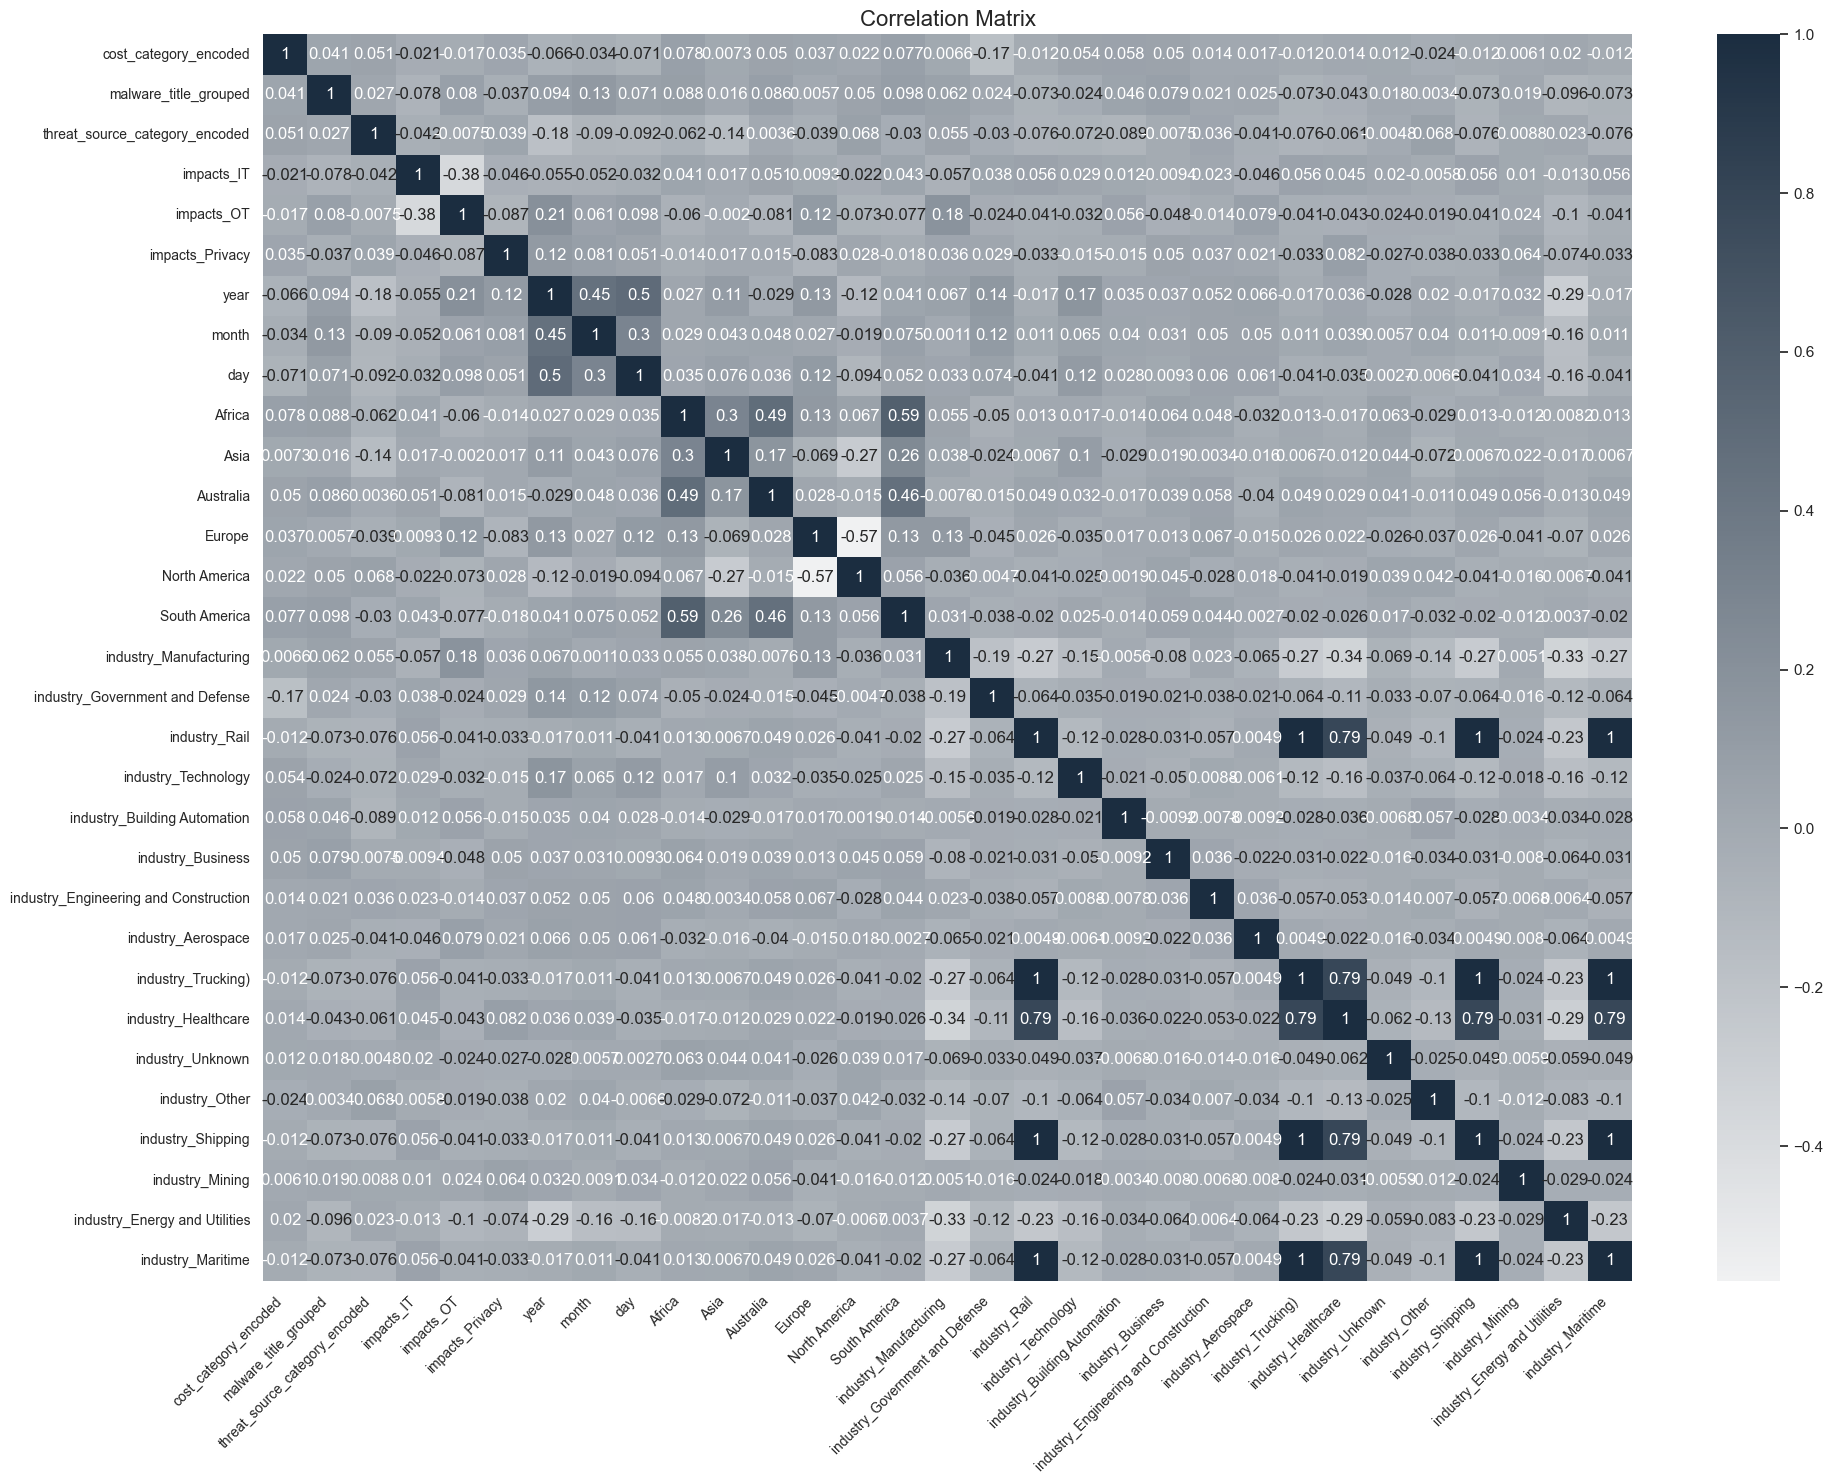

In [361]:
plt.figure(figsize=(20, 15))

corr_matrix = df_1.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap=denexus_palette, cbar=True)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "correlation-matrix.png")
    plt.savefig(output_path)
plt.show()

#### División en Conjuntos de Entrenamiento y Prueba.

In [362]:
X = df_1.drop('impacts_OT', axis=1)
y = df_1['impacts_OT']

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [364]:
y_train.value_counts()

impacts_OT
0    614
1    109
Name: count, dtype: int64

In [365]:
y_test.value_counts()

impacts_OT
0    248
1     62
Name: count, dtype: int64

#### Manejo de variables desbalanceadas.
Dado el desbalance de clases en el conjunto de entrenamiento, vamos a aplicar **Random Over-Sampling (ROS)** para equilibrar las clases minoritarias. Esta técnica aumenta la representación de las clases menos frecuentes duplicando aleatoriamente sus instancias, lo que permite que el modelo aprenda de manera más equitativa.

In [366]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

#### Entrenamiento y Evaluación de Modelos.
En este apartado entrenaremos modelos para predecir el tipo de impacto que un incidente puede tener en sistemas informáticos (IT), en operaciones físicas y maquinaria (OT), o en la confidencialidad de datos personales (Privacidad).

##### Arbol de Decisión.
Un Árbol de Decisión es un modelo útil para tareas de clasificación y regresión en aprendizaje automático. Es un modelo de decisión jerárquica que toma decisiones en función de las características de los datos y las distribuye en ramas, con cada nodo representando una prueba de una característica.

In [367]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(random_state=42)

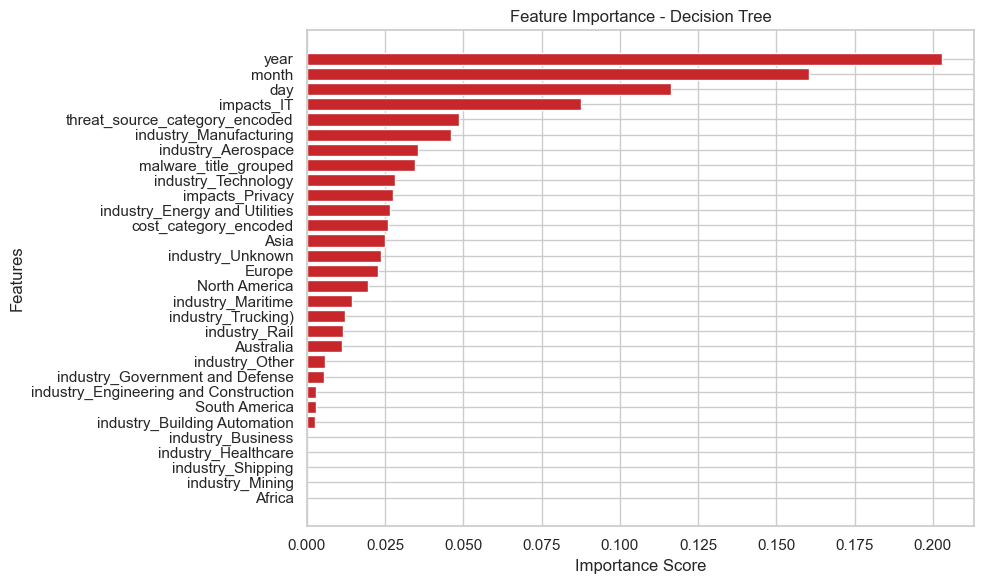

In [368]:
feature_importances = dt_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center', color=denexus_colors[2])
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance - Decision Tree')
plt.tight_layout()
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "feature-importance_decision-tree.png")
    plt.savefig(output_path)
plt.show()

In [369]:
cv_scores = cross_val_score(dt_model, X_train_ros, y_train_ros, cv=5, scoring='accuracy')
cv_scores

array([0.92276423, 0.92682927, 0.93089431, 0.95510204, 0.91020408])

In [370]:
print("Train set score (Accuracy) =", dt_model.score(X_train_ros, y_train_ros))
print("Test set score (Accuracy) =", dt_model.score(X_test, y_test))

conf_mat = confusion_matrix(y_test, dt_model.predict(X_test))

num_classes = conf_mat.shape[0]

print(tabulate(
    conf_mat,
    headers=[f'Pred Class {i}' for i in range(num_classes)],
    showindex=[f'Real Class {i}' for i in range(num_classes)],
    tablefmt='fancy_grid'
))

print("\nClassification Report:")
print(classification_report(y_test, dt_model.predict(X_test)))

Train set score (Accuracy) = 0.999185667752443
Test set score (Accuracy) = 0.7516129032258064
╒══════════════╤════════════════╤════════════════╕
│              │   Pred Class 0 │   Pred Class 1 │
╞══════════════╪════════════════╪════════════════╡
│ Real Class 0 │            209 │             39 │
├──────────────┼────────────────┼────────────────┤
│ Real Class 1 │             38 │             24 │
╘══════════════╧════════════════╧════════════════╛

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       248
           1       0.38      0.39      0.38        62

    accuracy                           0.75       310
   macro avg       0.61      0.61      0.61       310
weighted avg       0.75      0.75      0.75       310



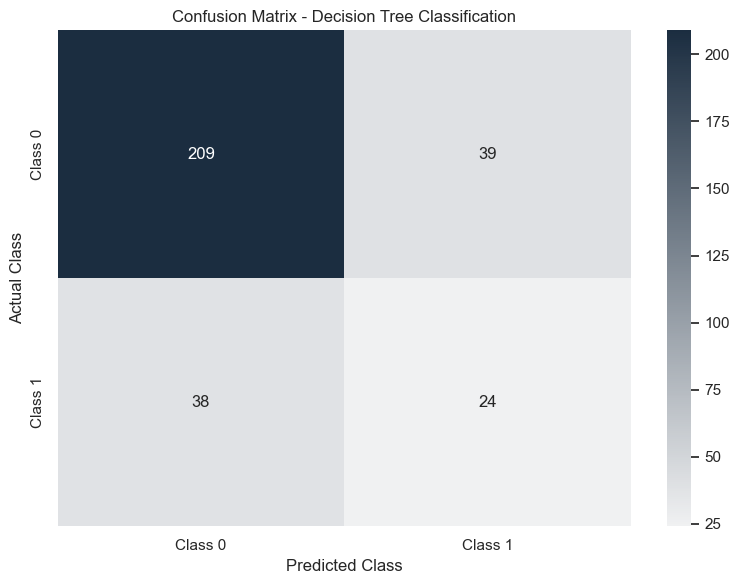

In [371]:
class_labels = [f'Class {i}' for i in range(conf_mat.shape[0])]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=denexus_palette,
            xticklabels=class_labels, yticklabels=class_labels, cbar=True)
plt.title('Confusion Matrix - Decision Tree Classification')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.tight_layout()
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "confusion-matrix_decision-tree.png")
    plt.savefig(output_path)
plt.show()

##### **KNeighbors.**

In [372]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_ros, y_train_ros)

KNeighborsClassifier(n_neighbors=7)

In [373]:
cv_scores = cross_val_score(knn_model, X_train_ros, y_train_ros, cv=5, scoring='accuracy')
cv_scores

array([0.70731707, 0.73577236, 0.7601626 , 0.75510204, 0.72244898])

In [374]:
print("Train set score (Accuracy) =", knn_model.score(X_train_ros, y_train_ros))
print("Test set score (Accuracy) =", knn_model.score(X_test, y_test))

conf_mat = confusion_matrix(y_test, knn_model.predict(X_test))

num_classes = conf_mat.shape[0]

print(tabulate(
    conf_mat,
    headers=[f'Pred Class {i}' for i in range(num_classes)],
    showindex=[f'Real Class {i}' for i in range(num_classes)],
    tablefmt='fancy_grid'
))

print("\nClassification Report:")
print(classification_report(y_test, knn_model.predict(X_test)))

Train set score (Accuracy) = 0.8281758957654723
Test set score (Accuracy) = 0.6451612903225806
╒══════════════╤════════════════╤════════════════╕
│              │   Pred Class 0 │   Pred Class 1 │
╞══════════════╪════════════════╪════════════════╡
│ Real Class 0 │            160 │             88 │
├──────────────┼────────────────┼────────────────┤
│ Real Class 1 │             22 │             40 │
╘══════════════╧════════════════╧════════════════╛

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.65      0.74       248
           1       0.31      0.65      0.42        62

    accuracy                           0.65       310
   macro avg       0.60      0.65      0.58       310
weighted avg       0.77      0.65      0.68       310



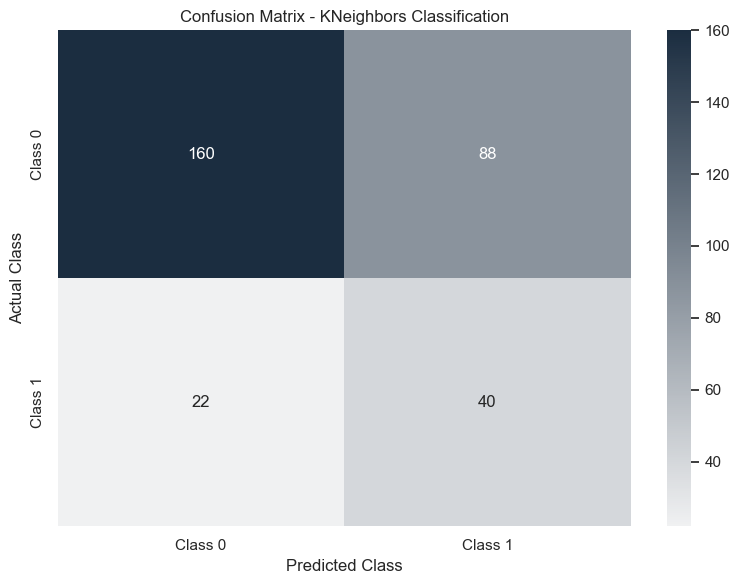

In [375]:
class_labels = [f'Class {i}' for i in range(conf_mat.shape[0])]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=denexus_palette,
            xticklabels=class_labels, yticklabels=class_labels, cbar=True)
plt.title('Confusion Matrix - KNeighbors Classification')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.tight_layout()
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "confusion-matrix_knn.png")
    plt.savefig(output_path)
plt.show()

#### Curva ROC.
La **curva ROC** (Receiver Operating Characteristic) es una representación gráfica utilizada para evaluar el rendimiento de un modelo de clasificación binaria. Muestra la relación entre la **tasa de verdaderos positivos (TPR)** y la **tasa de falsos positivos (FPR)** a medida que varía el umbral de decisión del modelo.

Un modelo perfecto tendrá una curva que pase cerca del vértice superior izquierdo (FPR=0, TPR=1), indicando un rendimiento ideal. El área bajo la curva (**AUC** - Area Under the Curve) resume en un único valor qué tan bien el modelo discrimina entre las dos clases, donde un valor de 1 indica un modelo perfecto y 0.5 sugiere un rendimiento aleatorio.

In [376]:
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

In [377]:
# Calcular FPR, TPR y el AUC.
## KNN.
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

## Decision Tree.
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

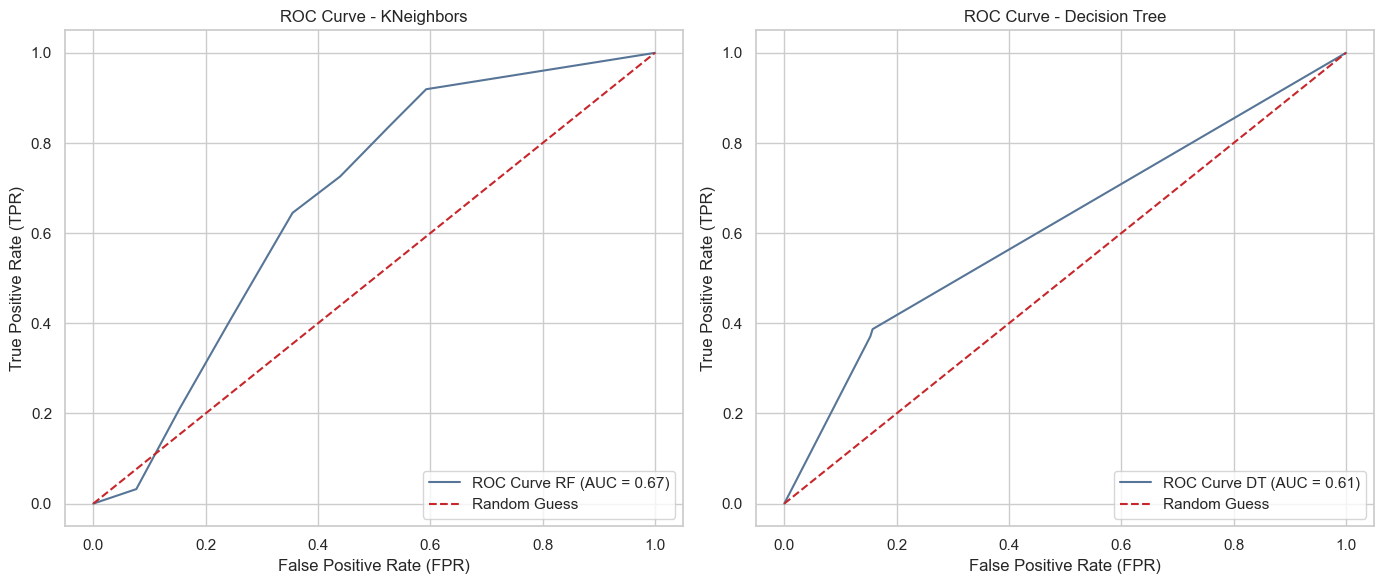

In [378]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

## Subplot para KNN.
axs[0].plot(fpr_knn, tpr_knn, label=f'ROC Curve RF (AUC = {roc_auc_knn:.2f})', color=denexus_colors[1])
axs[0].plot([0, 1], [0, 1], color=denexus_colors[2], linestyle='--', label='Random Guess')
axs[0].set_title('ROC Curve - KNeighbors')
axs[0].set_xlabel('False Positive Rate (FPR)')
axs[0].set_ylabel('True Positive Rate (TPR)')
axs[0].legend(loc='lower right')
axs[0].grid(True)

## Subplot para Decision Tree.
axs[1].plot(fpr_dt, tpr_dt, color=denexus_colors[1], label=f'ROC Curve DT (AUC = {roc_auc_dt:.2f})')
axs[1].plot([0, 1], [0, 1], color=denexus_colors[2], linestyle='--', label='Random Guess')
axs[1].set_title('ROC Curve - Decision Tree')
axs[1].set_xlabel('False Positive Rate (FPR)')
axs[1].set_ylabel('True Positive Rate (TPR)')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.tight_layout()
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "ROC-curve.png")
    plt.savefig(output_path)
plt.show()

#### Resultados.

In [379]:
from sklearn.neural_network import MLPClassifier

# Entrenamos el modelo de Redes Neuronales (MLPClassifier)
nn_model = MLPClassifier(random_state=42)

# Entrenamos el modelo
nn_model.fit(X_train, y_train)

# Hacemos las predicciones
nn_pred = nn_model.predict(X_test)


In [380]:
knn_pred = knn_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
nn_pred = nn_model.predict(X_test)

In [381]:
knn_precision = precision_score(y_test, knn_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')

In [382]:
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')

In [383]:
nn_precision = precision_score(y_test, nn_pred, average='weighted')
nn_recall = recall_score(y_test, nn_pred, average='weighted')

C:\Users\ale_m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [403]:
results = pd.DataFrame({
    'Model': ['KNeighbors', 'DecisionTree', 'NeuralNetworks'],
    'Accuracy': [knn_precision, dt_precision, nn_precision],
    'Recall': [knn_recall, dt_recall, nn_recall]
})

In [404]:
results

,Model,Accuracy,Recall
0,KNeighbors,0.765797,0.645161
1,DecisionTree,0.753114,0.751613
2,NeuralNetworks,0.640000,0.800000


### Modelo No Supervisado.
Aplicamos el modelo no supervisado K-Means para agrupar los datos en los clusters indicados a través del método Elbow, utilizando las características del conjunto de entrenamiento. Finalmente, se genera un resumen de las medias de las características por cada cluster para su análisis.

#### **KMeans.**

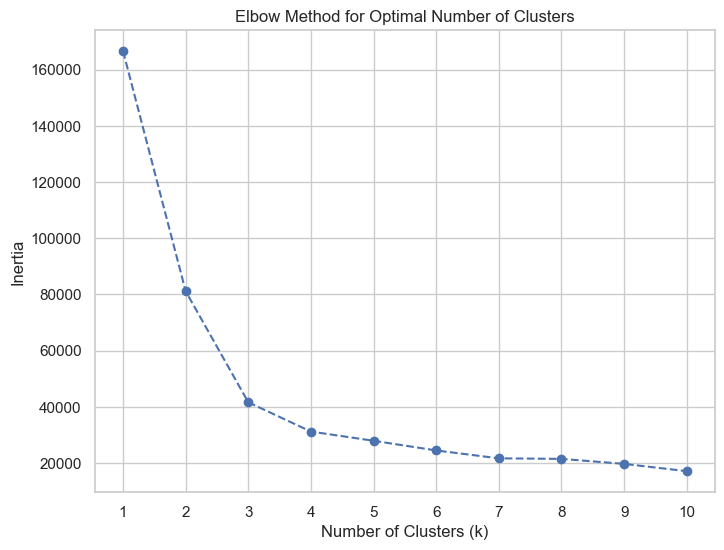

In [389]:
#Elbow method
X_unsupervised = df_1.drop(columns='impacts_OT')
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_unsupervised)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [390]:
for k, score in zip(range(1, 11), inertia):
    print(f"Number of Clusters (k={k}): Inertia = {score:.4f}")

Number of Clusters (k=1): Inertia = 166556.1684
Number of Clusters (k=2): Inertia = 81141.7774
Number of Clusters (k=3): Inertia = 41637.8856
Number of Clusters (k=4): Inertia = 31229.3025
Number of Clusters (k=5): Inertia = 27961.9995
Number of Clusters (k=6): Inertia = 24513.9310
Number of Clusters (k=7): Inertia = 21709.6689
Number of Clusters (k=8): Inertia = 21520.8675
Number of Clusters (k=9): Inertia = 19739.7753
Number of Clusters (k=10): Inertia = 17144.5573


In [391]:
#KMeans
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_unsupervised)

KMeans(n_clusters=6, random_state=42)

In [392]:
print(f"Optimal number of clusters: {optimal_k}")
print(f"Inertia for optimal_k ({optimal_k}): {kmeans.inertia_:.4f}")

Optimal number of clusters: 6
Inertia for optimal_k (6): 24513.9310


## Visualización de datos.

### Número de incidentes por año.

C:\Users\ale_m\AppData\Local\Temp\ipykernel_12856\1773382659.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette=denexus_colors)
C:\Users\ale_m\AppData\Local\Temp\ipykernel_12856\1773382659.py:3: UserWarning: 
The palette list has fewer values (6) than needed (35) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='year', data=df, palette=denexus_colors)


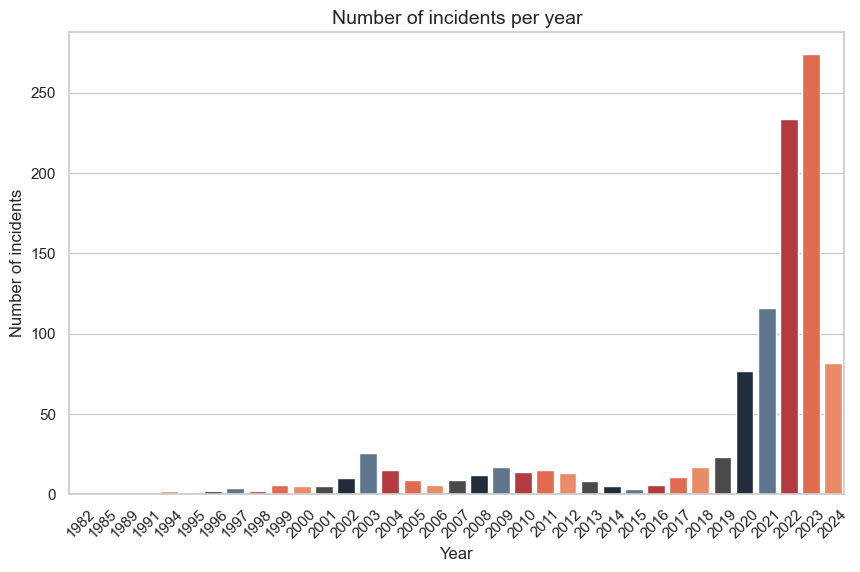

In [393]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df, palette=denexus_colors)
plt.title('Number of incidents per year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of incidents')
plt.xticks(rotation=45)
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "number-incidents-per-year.png")
    plt.savefig(output_path)
plt.show()

### Número de incidentes por mes.

C:\Users\ale_m\AppData\Local\Temp\ipykernel_12856\3261656846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df, palette=denexus_colors)
C:\Users\ale_m\AppData\Local\Temp\ipykernel_12856\3261656846.py:2: UserWarning: 
The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='month', data=df, palette=denexus_colors)


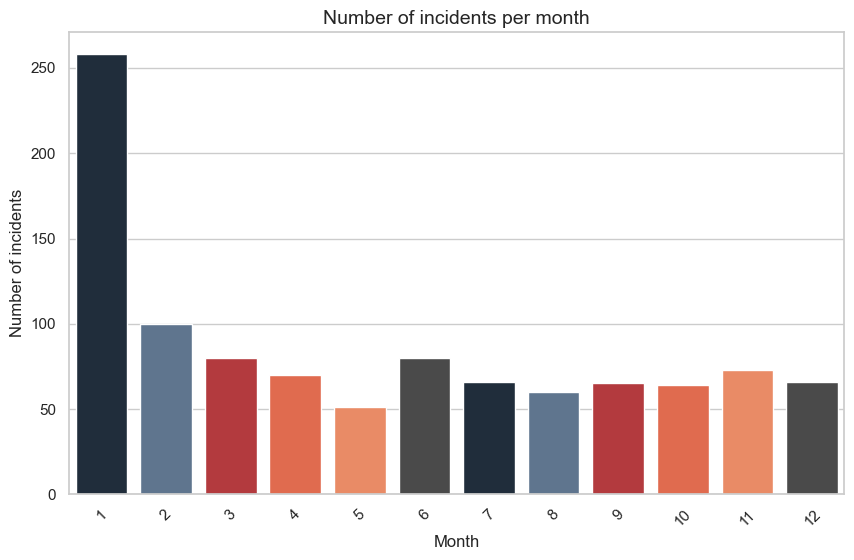

In [394]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df, palette=denexus_colors)
plt.title('Number of incidents per month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of incidents')
plt.xticks(rotation=45)
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "number-incidents-per-month.png")
    plt.savefig(output_path)
plt.show()

### Distribución de los incidentes por continente.

C:\Users\ale_m\AppData\Local\Temp\ipykernel_12856\2196004329.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


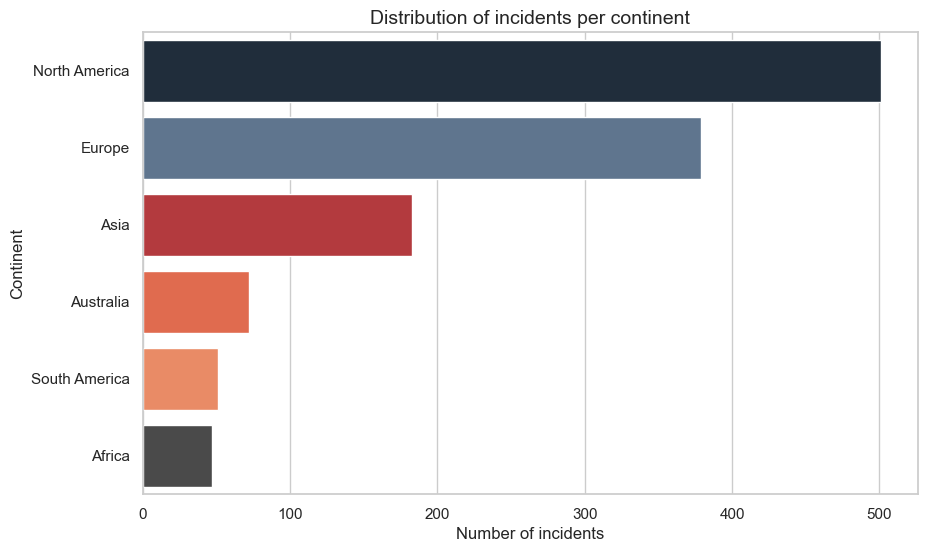

In [395]:
continents_columns = ['Africa', 'Asia', 'Australia', 'Europe', 'North America', 'South America']
continent_counts = df[continents_columns].sum().reset_index()
continent_counts.columns = ['Continent', 'Incident Count']

plt.figure(figsize=(10, 6))
sns.barplot(
    y='Continent',
    x='Incident Count',
    data=continent_counts,
    palette=denexus_colors,
    order=continent_counts.sort_values('Incident Count', ascending=False)['Continent']
)
plt.title('Distribution of incidents per continent', fontsize=14)
plt.xlabel('Number of incidents')
plt.ylabel('Continent')
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "number-incidents-per-continent.png")
    plt.savefig(output_path)
plt.show()

### Distribución del tipo de impacto.

C:\Users\ale_m\AppData\Local\Temp\ipykernel_12856\3628056285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette=denexus_colors, ax=axes[i])
C:\Users\ale_m\AppData\Local\Temp\ipykernel_12856\3628056285.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=column, data=df, palette=denexus_colors, ax=axes[i])
C:\Users\ale_m\AppData\Local\Temp\ipykernel_12856\3628056285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette=denexus_colors, ax=axes[i])
C:\Users\ale_m\AppData\Local\Temp\ipykernel_12856\3628056285.py:5: UserWarning: The palette list has more values (6) than need

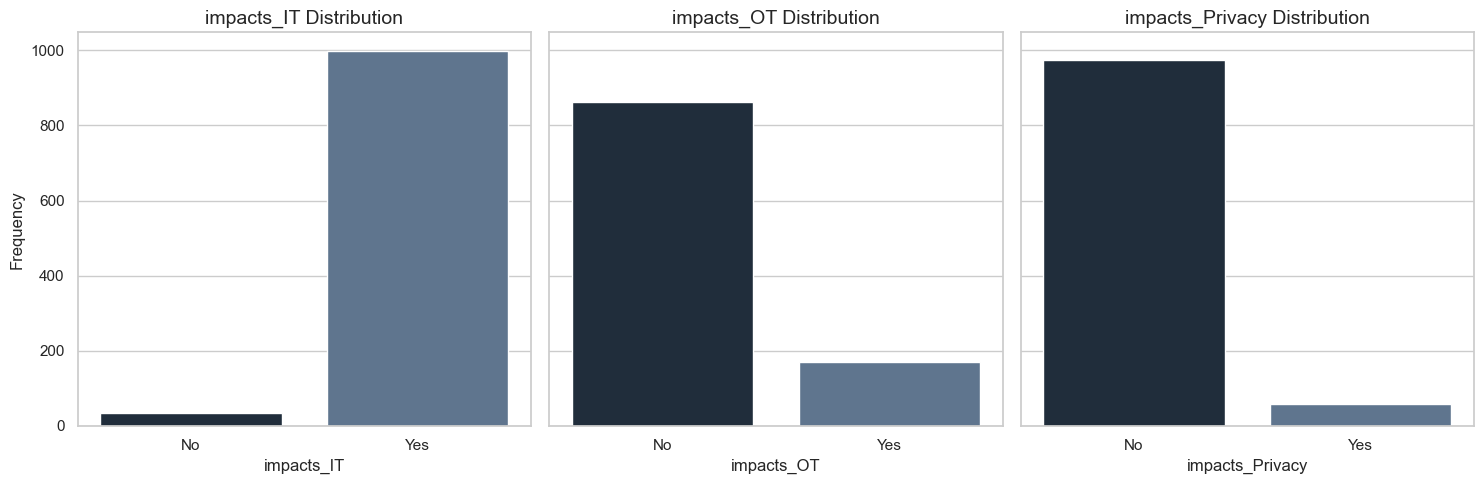

In [396]:
binary_columns = ['impacts_IT', 'impacts_OT', 'impacts_Privacy']
num_columns = len(binary_columns)
fig, axes = plt.subplots(1, num_columns, figsize=(5 * num_columns, 5), sharey=True)
for i, column in enumerate(binary_columns):
    sns.countplot(x=column, data=df, palette=denexus_colors, ax=axes[i])
    axes[i].set_title(f'{column} Distribution', fontsize=14)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "impacts-distribution.png")
    plt.savefig(output_path)
plt.tight_layout()
plt.show()


### Distribución de tipos de industrias.

C:\Users\ale_m\AppData\Local\Temp\ipykernel_12856\687211496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ale_m\AppData\Local\Temp\ipykernel_12856\687211496.py:5: UserWarning: 
The palette list has fewer values (6) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


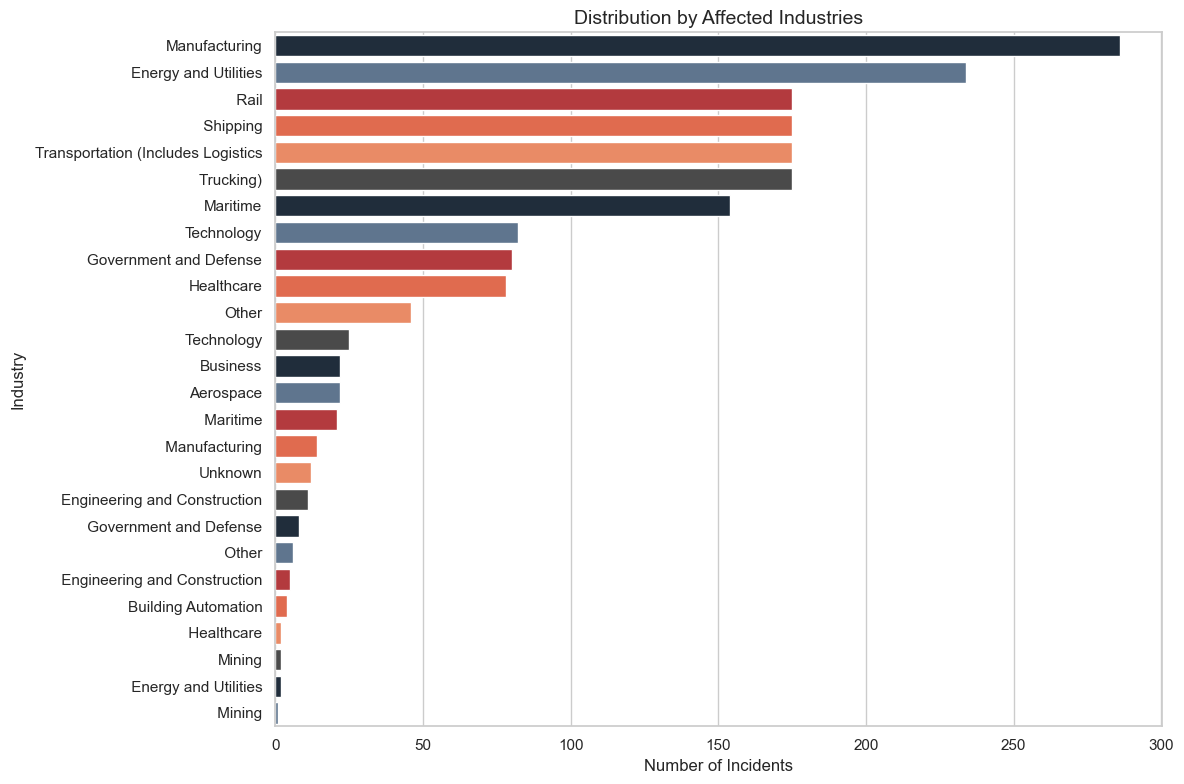

In [397]:
industries_split = df['industries_grouped'].str.split(',').explode()
industry_counts = industries_split.value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(
    y=industry_counts.index,
    x=industry_counts.values,
    palette=denexus_colors
)
plt.title('Distribution by Affected Industries', fontsize=14)
plt.xlabel('Number of Incidents')
plt.ylabel('Industry')
plt.tight_layout()
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "distribution-industries.png")
    plt.savefig(output_path)
plt.show()

### Análisis de impacto por sector.

C:\Users\ale_m\AppData\Local\Temp\ipykernel_12856\1091894004.py:12: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


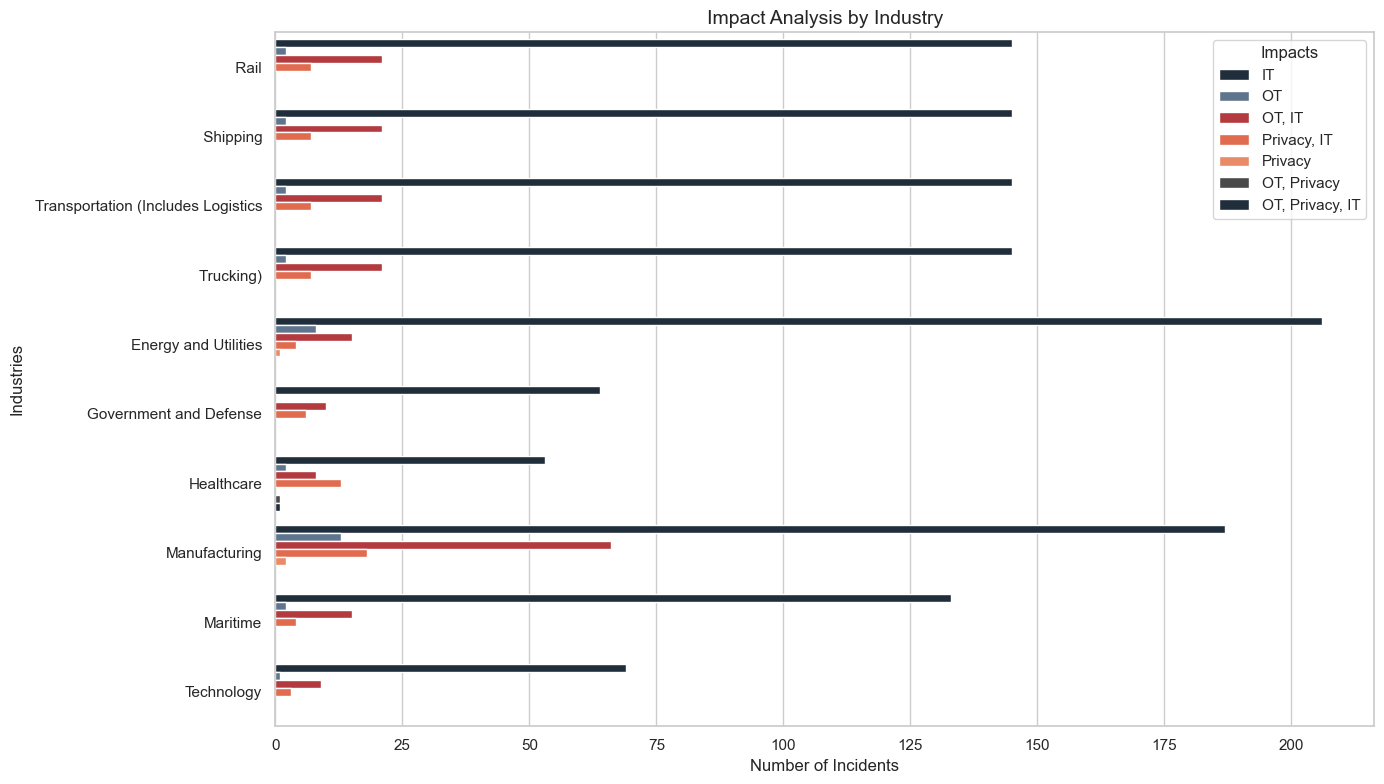

In [398]:
industries_split = df['industries_grouped'].dropna().str.split(',').explode()
expanded_data = df[['impacts']].join(industries_split.rename('industries_grouped'))
impact_data = expanded_data.groupby(['industries_grouped', 'impacts']).size().reset_index(name='count')
top_industries = (
    impact_data.groupby('industries_grouped')['count'].sum()
    .nlargest(10)
    .index
)
filtered_impact_data = impact_data[impact_data['industries_grouped'].isin(top_industries)]

plt.figure(figsize=(14, 8))
sns.barplot(
    data=filtered_impact_data,
    x='count',
    y='industries_grouped',
    hue='impacts',
    palette=denexus_colors
)
plt.title('Impact Analysis by Industry', fontsize=14)
plt.xlabel('Number of Incidents')
plt.ylabel('Industries')
plt.legend(title='Impacts', loc='upper right')
plt.tight_layout()
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "impacts-by-industries.png")
    plt.savefig(output_path)
plt.show()

### Tendencias temporales de los incidentes por continente.

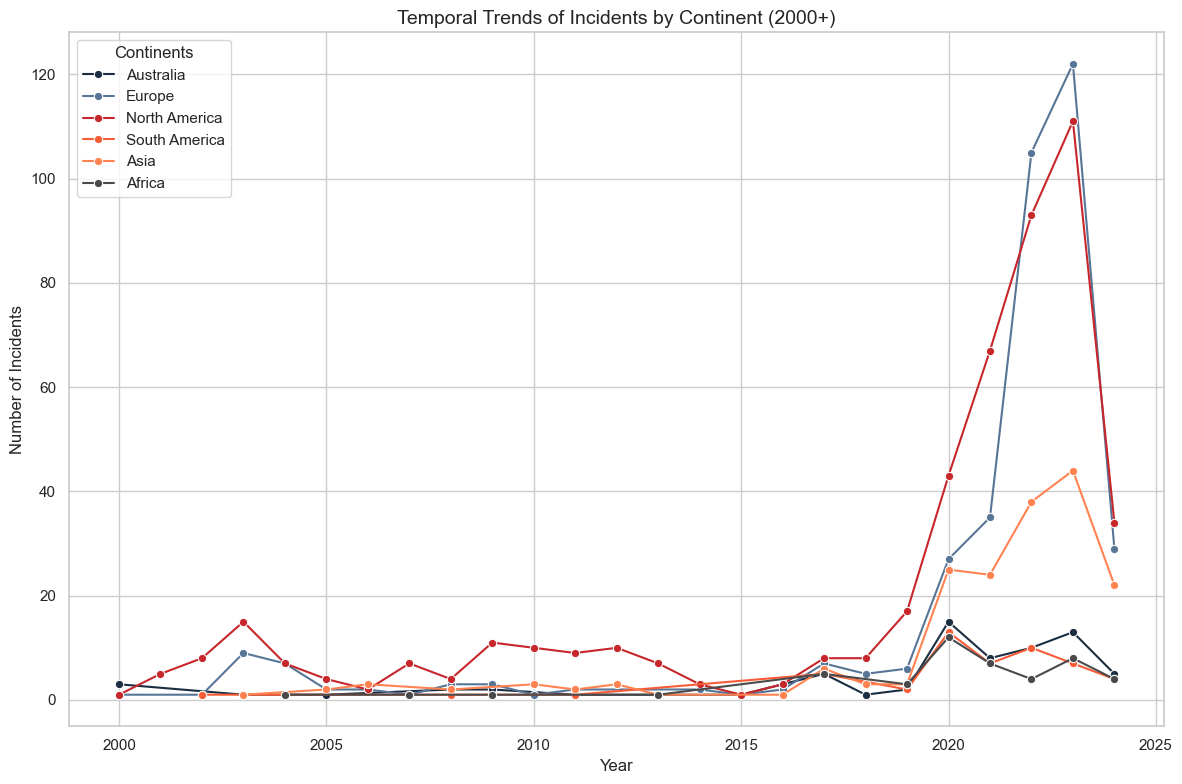

In [399]:
df_filtered = df[df['year'] >= 2000]
continents_columns = ['Africa', 'Asia', 'Australia', 'Europe', 'North America', 'South America']
temporal_data = df_filtered.melt(
    id_vars=['year'], 
    value_vars=continents_columns, 
    var_name='continent', 
    value_name='is_present'
)
temporal_data = temporal_data[temporal_data['is_present'] == 1]
temporal_data = temporal_data.groupby(['year', 'continent']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.lineplot(data=temporal_data, x='year', y='count', hue='continent', marker='o', palette=denexus_colors)
plt.title('Temporal Trends of Incidents by Continent (2000+)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Continents', loc='upper left')
plt.grid(True)
plt.tight_layout()
# Guardar el gráfico en la carpeta 'plots'.
output_dir = "plots"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    output_path = os.path.join(output_dir, "trends-incident-continent.png")
    plt.savefig(output_path)
plt.show()

## Modelos No Supervisado

Red Neuronal

In [400]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles


NumSamples=150


# Creates a gaussian distribution of data
X, y = make_blobs(
      n_samples=NumSamples,       # Number of data
      n_features=2,               # Number of features
      centers=2,                  # Number of clusters
      center_box=(-10.0, 10.0),   # Range of values for each feature
      cluster_std=1.5,            # Standard deviation
      shuffle=True,               # Don't order data by labels
      random_state=None,          # Put a number to get reproducible results
      return_centers=False        # If True, add another output parameter
      )


X,y=make_circles(
      n_samples=NumSamples,      # Number of data
      factor=0.15,               # Scale factor between inner and outer circle [0,1)
      noise=0.1,                 # Standard deviation
      shuffle=True,              # To shuffle the samples
      random_state=None          # Put a number to get reproducible results
      )


X,y=make_moons(
      n_samples=NumSamples,      # Number of data
      noise=0.1,                 # Standard deviation
      shuffle=True,              # To shuffle the samples
      random_state=None          # Put a number to get reproducible results
      )

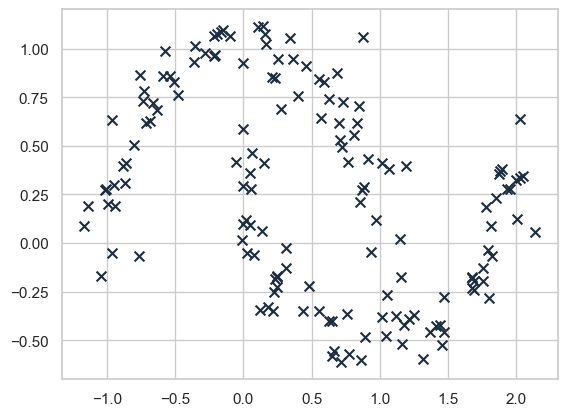

In [401]:
# Plot the data. Columns 0 and 1 are the two features
plt.scatter(X[:, 0],X[:, 1],c="#1B2D40",marker="x",s=50)
plt.show()

[0 1]


C:\Users\ale_m\AppData\Local\Temp\ipykernel_12856\3212218777.py:66: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1],


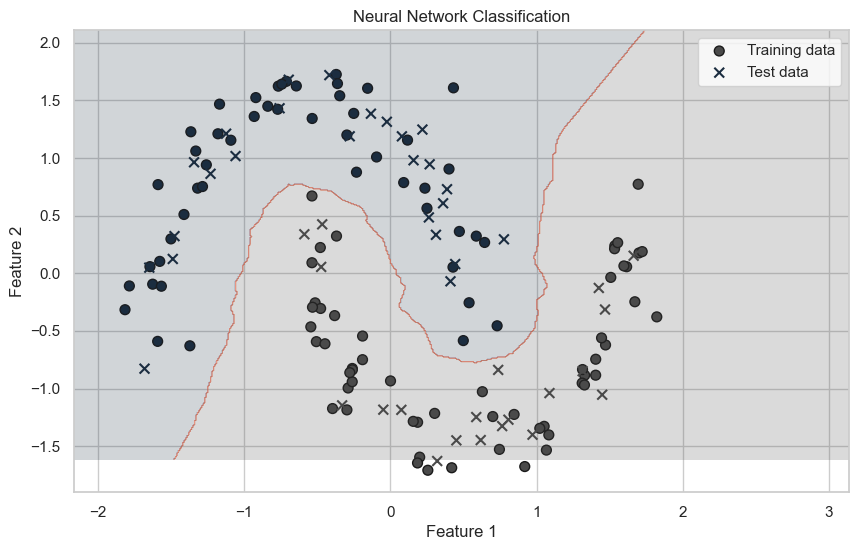

In [402]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)














from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt


# Define the model
model = KNeighborsClassifier(n_neighbors=5)


# Train the model
model.fit(X_train, y_train)


# Predict for test data
y_pred = model.predict(X_test)


# Check the unique values in y_pred to ensure we are using the correct number of colors
print(np.unique(y_pred))  # Check the unique class labels in y_pred


# If the unique classes are more than the colors in the palette, update the palette size
denexus_colors = ['#1B2D40', '#577596', '#C7262B', '#F85C37', '#FF8250', '#4A4A4A']
denexus_cmap = ListedColormap(denexus_colors)


# Plot the results
plt.figure(figsize=(10, 6))


# Plot the training data using the custom colormap (DENEXUS PALETTE)
plt.scatter(X_train[:, 0], X_train[:, 1],
            c=y_train, cmap=denexus_cmap,
            marker='o', edgecolor='k', s=50, label='Training data')


# Plot the test data using the custom colormap
plt.scatter(X_test[:, 0], X_test[:, 1],
            c=y_pred, cmap=denexus_cmap,
            marker='x', edgecolor='k', s=50, label='Test data')


# Generate decision boundary
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))


# Make predictions for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Apply the custom colormap for the decision boundary
plt.contourf(xx, yy, Z, alpha=0.2, cmap=denexus_cmap)


# Add title and labels
plt.title('Neural Network Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()